## <a id='toc1_1_'></a>[MartForecast: Navigating Retail Success with Predictive Analytics](#toc0_)

![image](images/background.jpg)

**Table of contents**<a id='toc0_'></a>    

**Author:** - [Martin Dudi]('https://github.com/Dudimath')

*Passionate about data exploration and analysis. Currently interning in Data Science and Machine Learning at Technocolab Softwares.*

# <a id='toc3_'></a>[Introduction](#toc0_)

In the dynamic landscape of retail, accurate sales predictions play a pivotal role in optimizing inventory management, ensuring customer satisfaction, and maximizing profitability. BigMart, a prominent retail chain, has amassed extensive sales data from **2013**, covering **1559 unique products** distributed across **10 stores** situated in diverse cities. This dataset encapsulates crucial attributes of each product and store, offering a rich source for predictive modeling and actionable insights.

# <a id='toc4_'></a>[Business Understanding](#toc0_)
## <a id='toc4_1_'></a>[Problem Statement](#toc0_)
**Problem Description:**

The primary objective of this data science project is **to construct a robust predictive model capable of forecasting the sales for each individual product at specific stores**. By doing so, BigMart aims to unravel the intrinsic properties of both products and stores that significantly influence sales performance. This predictive model holds the potential to guide strategic decision-making within the company, facilitating a deeper understanding of the factors driving successful sales outcomes.

## <a id='toc4_2_'></a>[Challenges & Considerations](#toc0_)

One notable challenge in the dataset is the presence of missing values, attributed to technical glitches that led to incomplete reporting from certain stores. Addressing these missing values is imperative to ensure the reliability and accuracy of the predictive model. The structured approach outlined in the project plan involves hypothesis generation, exploratory data analysis, handling missing values, feature engineering, and model building using diverse techniques like linear regression, regularized linear regression, RandomForest, and XGBoost.

## <a id='toc4_3_'></a>[Project Significance](#toc0_)

Successfully building and deploying an accurate predictive model not only aids BigMart in optimizing inventory and boosting sales but also provides a framework for future decision-making. Understanding the key drivers of sales can guide product placement, promotional strategies, and inventory stocking levels, leading to improved operational efficiency and customer satisfaction.

**Hypothesis:**

Different types of products significantly influence sales. Products with distinct characteristics, such as higher visibility, unique branding, or specific categories, may exhibit varying sales patterns.

**Product Type Impact:**

`Hypothesis:` Different types of products may have varying sales patterns. For example, high-value items or products in certain categories might contribute more to overall sales.

**Store Location Influence:**

`Hypothesis:` The location of stores can affect sales. Stores in certain cities or regions might experience higher sales due to factors like population density or local preferences.

**Store Size and Sales:**

`Hypothesis:` Larger store sizes could lead to higher sales as they might offer a wider range of products, attracting more customers.

**Promotional Effect:**

`Hypothesis:` Products with more visibility (e.g., through promotions) might have increased sales. Visibility can be influenced by factors like advertising and store layout.

**Establishment Year Significance:**

`Hypothesis:` The establishment year of a store may impact sales. Older stores might have a loyal customer base, while newer stores might attract customers with modern offerings.


**Pricing Strategy:**

`Hypothesis:` The pricing strategy, as reflected in the Maximum Retail Price (MRP), can influence sales. Items with competitive prices might experience higher demand.

**Outlet Type Variation:**

`Hypothesis:` Different types of outlets (e.g., supermarkets, grocery stores) may have distinct sales patterns. Supermarkets might experience higher sales due to a wider product range.

**Seasonal Trends:**

`Hypothesis:` Seasonal variations could impact sales. For instance, sales might increase during festive seasons or specific times of the year.

**Store Size and Outlet Type Interaction:**

`Hypothesis:` The impact of store size on sales may vary across different types of outlets. Larger stores might have a more significant impact on sales in specific outlet types.

**Brand Loyalty:**

`Hypothesis:` Customers might exhibit brand loyalty, leading to higher sales for specific brands or product categories.

## Data Understanding

### ***Dataset Description***

### Overview

This [dataset](https://shahyaseen71.gitbook.io/technocolabs-mini-project/) provides information about various products and their sales across different stores. Here are the key features present in the dataset:

- **Item_Identifier:** Unique product ID.
- **Item_Weight:** Weight of the product.
- **Item_Fat_Content:** Indicates whether the product is low fat or not.
- **Item_Visibility:** The percentage of the total display area of all products in a store allocated to the particular product.
- **Item_Type:** The category to which the product belongs.
- **Item_MRP:** Maximum Retail Price (list price) of the product.
- **Outlet_Identifier:** Unique store ID.
- **Outlet_Establishment_Year:** The year in which the store was established.
- **Outlet_Size:** The size of the store in terms of ground area covered.
- **Outlet_Location_Type:** The type of city in which the store is located.
- **Outlet_Type:** Indicates whether the outlet is just a grocery store or some sort of supermarket.
- **Item_Outlet_Sales:** Sales of the product in the particular store (the outcome variable to be predicted).

# <a id='toc7_'></a>[Importing Necessary Libraries](#toc0_)

In [8]:
# Importing relevant libraries
import pandas as pd  # For data manipulation and analysis
import os  # For operating system-related functions
import matplotlib.pyplot as plt  # For creating data visualizations
import seaborn as sns  # For enhanced data visualization
import numpy as np  # For numerical computations
from wordcloud import WordCloud  # For generating word clouds
import warnings  # For managing warnings
import folium 
# Ignore future deprecation warnings
warnings.filterwarnings("ignore")
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
# Modelling
# Importing necessary modules for model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Importing regression models
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors Regressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  # Linear Models
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.tree import DecisionTreeRegressor  # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor  # Ensemble Models
from xgboost import XGBRegressor  # XGBoost Regressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
import joblib
from flask import Flask, request, jsonify

# <a id='toc8_'></a>[Read the Datasets](#toc0_)

In [9]:
# Read the two datasets
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [10]:
# print the datasets
train_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [11]:
test_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [12]:
train_df.shape,test_df.shape

((8523, 12), (5681, 11))

In [13]:
# Display unique values in the 'Outlet_Size' column of the 'test' dataset
test_df["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [14]:
# Display unique values in the 'Outlet_Size' column of the 'test' dataset
train_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
test_df["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [16]:
# Replace 'LF' with 'Low Fat', 'reg' with 'Regular', and 'low fat' with 'Low Fat' in 'Item_Fat_Content'
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [17]:
# Replace 'LF' with 'Low Fat', 'reg' with 'Regular', and 'low fat' with 'Low Fat' in 'Item_Fat_Content'
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

There could be a potential typo or inconsistency in the 'Item_Fat_Content' column, as similar content may have been written in different ways.

In [18]:
# Get the number of unique values in each column of the DataFrame
unique_counts = train_df.nunique()

# Print the results
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [19]:
# Get the number of unique values in each column of the test DataFrame
unique_counts_test = test_df.nunique()

# Print the results
print("Number of unique values in each column of test_df:")
print(unique_counts_test)

Number of unique values in each column of test_df:
Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                2
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


In [20]:
# Get the number of missing values in each column of the train DataFrame
missing_values_train = train_df.isna().sum()

# Print the results
print("Number of missing values in each column of train_df:")
print(missing_values_train)

Number of missing values in each column of train_df:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [21]:
# Add a 'source' column to identify the source of each record
train_df['source'] = 'train'
test_df['source'] = 'test'
test_df['Item_Outlet_Sales']=0.0

# Combine the datasets vertically
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the combined dataframe
combined_df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092            OUT049   
1                Soft Drinks   48.2692            OUT018   
2                       Meat  141.6180            OUT049   
3      Fruits and Vegetables  182.0950            OUT010   
4                  Household   53.8614            OUT013   
...                      ...       ...               ...   
14199            Snack Foods  141.3154            OUT046   
14200          Starchy Foods  169.1448            OUT018   
14201     Health and Hygiene  118.7440            OUT045   
14202                 Canned  214.6218            OUT017   
14203                 Canned   79.7960            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                           1999      Medium               Tier 1   
1                           2009      Medium               Tier 3   
2                           1999      Medium               Tier 1   
3                           1998         NaN               Tier 3   
4                           1987        High               Tier 3   
...                          ...         ...                  ...   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales source  
0      Supermarket Type1          3735.1380  train  
1      Supermarket Type2           443.4228  train  
2      Supermarket Type1          2097.2700  train  
3          Grocery Store           732.3800  train  
4      Supermarket Type1           994.7052  train  
...                  ...                ...    ...  
14199  Supermarket Type1             0.0000   test  
14200  Supermarket Type2             0.0000   test  
14201  Supermarket Type1             0.0000   test  
14202  Supermarket Type1             0.0000   test  
14203  Supermarket Type1             0.0000   test  

[14204 rows x 13 columns]

In [22]:
combined_df.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         1308.865489  
std          1699.791423  
min             0.000000  
25%             0.000000  
50%           559.272000  
75%          2163.184200  
max         13086.964800

#### Item Weight:
The 'Item Weight' feature exhibits null values, indicated by a count less than the total number of rows in the dataset.

#### Item MRP and Outlet Establishment Year:
'Item MRP' and 'Outlet Establishment Year' display a distribution with mean values lower than the median, suggesting a left-skewed distribution with concentration towards lower values.

#### Other Features:
Remaining features demonstrate a right-skewed distribution, with mean values exceeding the median.

#### Variance:
'Item Visibility' demonstrates nearly zero variance, indicating values close to the mean, while 'Item MRP' has high variance, indicating a broader range of values.

#### Outliers:
The presence of outliers is evident from the unequal distribution of minimum and maximum values, as well as an uneven interquartile range.

#### Visibility:
Remarkably, 'Item Visibility' has a minimum value of zero, an improbable scenario. Treating zero visibility as a null value may be appropriate in this context.

**Data Split in Supervised Learning:**

- Training Dataset: Contains both input features and the target variable for model training.
- Test Dataset: Contains only input features; the model predicts the target variable for evaluation.
- Purpose: Evaluate model generalization on unseen data.

  *In this project, the absence of Item_Outlet_Sales in the test dataset aligns with standard supervised learning practices.*

In [23]:
# Save the combined dataframe to a CSV file
combined_df.to_csv('combined_df.csv', index=False)

# Verify the file creation
import os
print(f"File 'combined_df.csv' created: {os.path.isfile('combined_df.csv')}")

File 'combined_df.csv' created: True


In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

**Dataset Overview:**

**Rows and Columns:** The dataset consists of *14,204 entries* across *13 columns.*

**Key Features:**

- `Item_Identifier:` Unique identifier for each product.
- `Item_Fat_Content:` Indicates the fat content of the product.
- `Item_Visibility:` Visibility of the product in the store.
- `Item_Type:` Category/type of the product.
- `Item_MRP:` Maximum Retail Price of the product.
- `Outlet_Identifier:` Unique identifier for each store.
- `Outlet_Establishment_Year:` Year of establishment for each store.
- `Outlet_Size:` Size of the store (10188 non-null values).
- `Outlet_Location_Type:` Type of city where the store is located.
- `Outlet_Type:` Type of outlet (e.g., supermarket, grocery store).
- `Item_Outlet_Sales:` Sales of the product in the store (8523 non-null values).
- `source:` Indicates whether the data point is from the train or test dataset.
  **Missing Values:**

-` Item_Weight:` Missing values exist for 2,439 entries.
- `Outlet_Size:` Missing values exist for 4,016 entries.
- `Item_Outlet_Sales:` Missing values exist for entries that are part of the test dataset, as sales are the target variable being predicted.
- **Note:** Missing values in Item_Outlet_Sales are intentional and correspond to entries in the test dataset where sales need to be predicte

### Item Outlet Sales Distribution

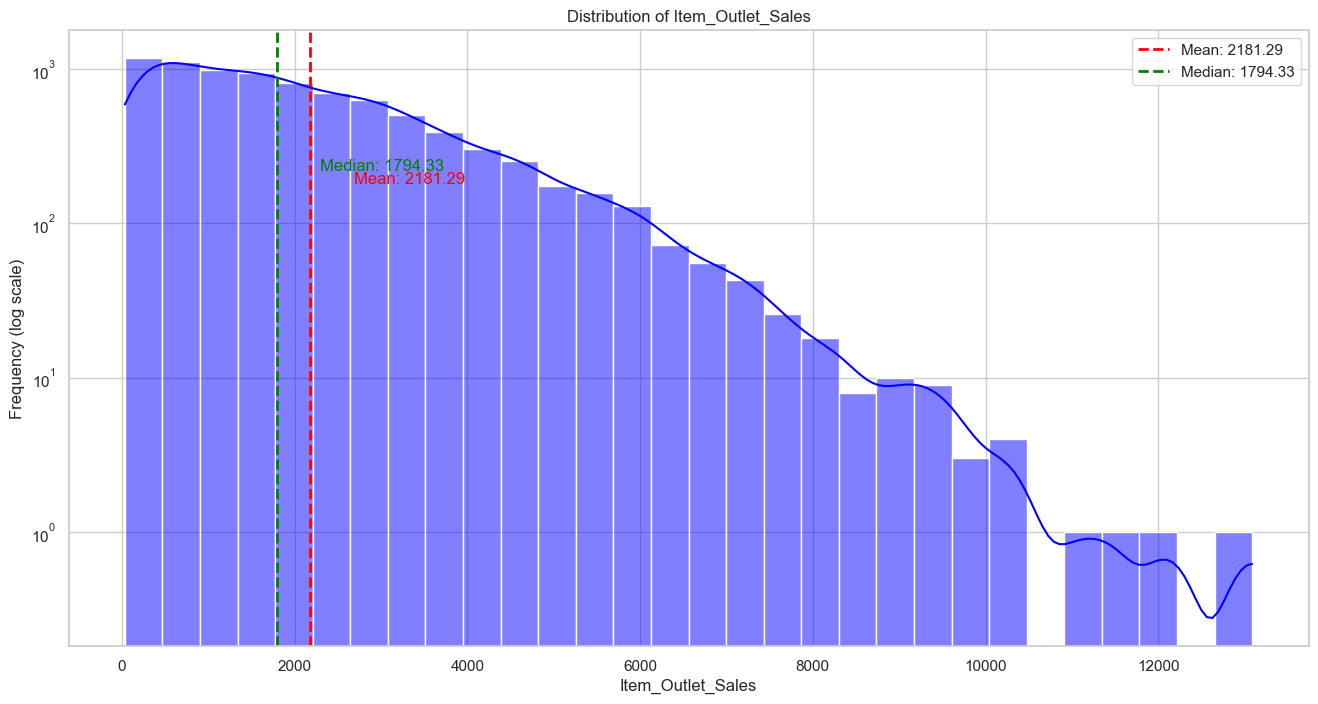

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Distribution plot for Item_Outlet_Sales
plt.figure(figsize=(16, 8))
sns.histplot(train_df['Item_Outlet_Sales'], bins=30, kde=True, color='blue')

# Add mean and median lines
mean_sales = train_df['Item_Outlet_Sales'].mean()
median_sales = train_df['Item_Outlet_Sales'].median()
plt.axvline(mean_sales, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_sales:.2f}')
plt.axvline(median_sales, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_sales:.2f}')

# Annotate mean and median values
plt.text(mean_sales + 500, 180, f'Mean: {mean_sales:.2f}', color='red')
plt.text(median_sales + 500, 220, f'Median: {median_sales:.2f}', color='green')

# Set log scale on y-axis
plt.yscale('log')

# Set plot details
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency (log scale)')
plt.legend()

# Show the plot
plt.show()

The downward trend in the histogram as sales increase suggests a right-skewed distribution, which is a common characteristic in sales data. Here are some insights based on the observed distribution:

**Skewed Distribution:**

The right-skewed distribution indicates that a significant number of products have lower sales values, while fewer products achieve higher sales. This is typical in retail scenarios where most products are sold in moderate quantities, but a few high-demand items contribute significantly to total sales.
- **Common Purchases:**

Products with sales on the lower end of the scale are likely everyday items that customers commonly purchase.
- **High-Value Items:**

The long right tail suggests that there are some high-value items contributing substantially to total sales. Identifying and understanding these high-value items could be crucial for strategic decision-making.
Outliers:

The presence of outliers (very high sales values) can significantly impact the mean and make it higher than the median. The dashed lines representing mean and median in the plot help illustrate this. The mean is influenced by extreme values, while the median remains a robust measure of central tendency.
- **Log Transformation:**

The log scale on the y-axis is applied to better visualize the distribution, especially when dealing with a wide range of sales values. This transformation compresses the higher values, making patterns in the lower range more visible.

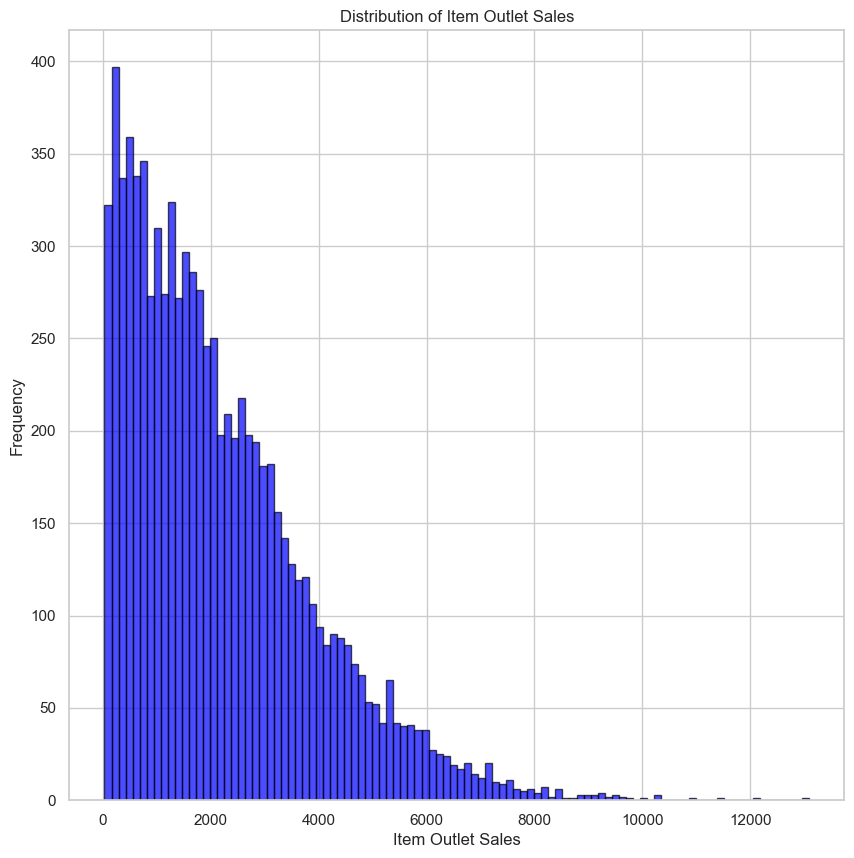

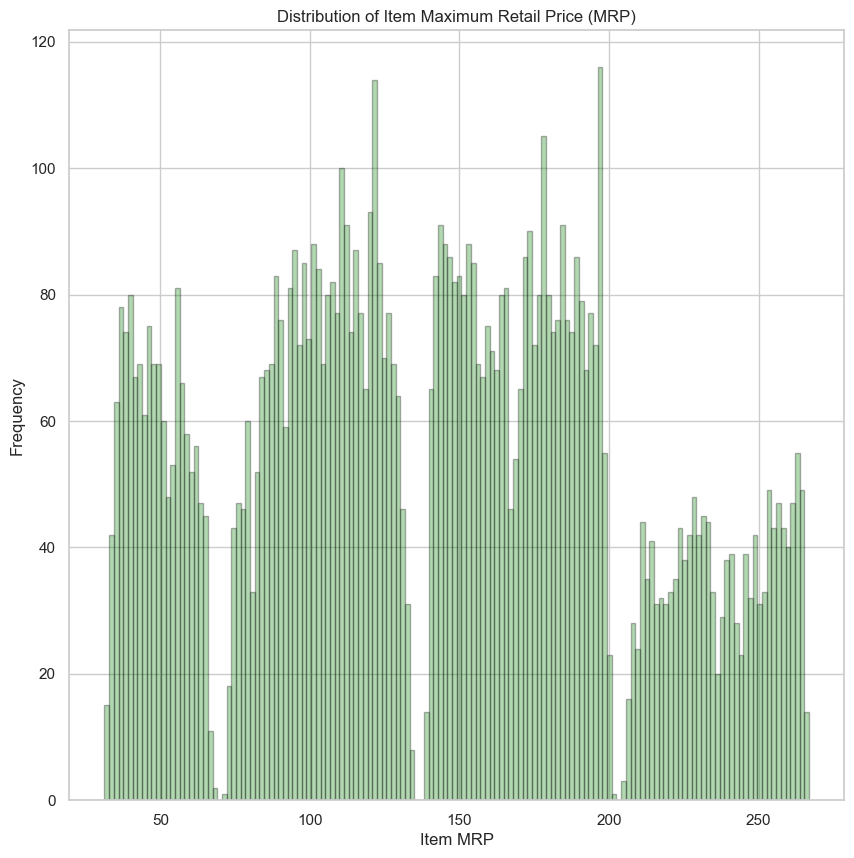

In [26]:
# Set the default figure size for better visualization
plt.rcParams['figure.figsize'] = (10, 10)

# Plot a histogram for 'Item_Outlet_Sales' with 100 bins
plt.hist(train_df["Item_Outlet_Sales"], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for 'Item_MRP' with 150 bins and 30% transparency
plt.hist(train_df["Item_MRP"], bins=150, color='green', edgecolor='black', alpha=0.3)
plt.title('Distribution of Item Maximum Retail Price (MRP)')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()

## Univariate Analysis

### Numeric Features

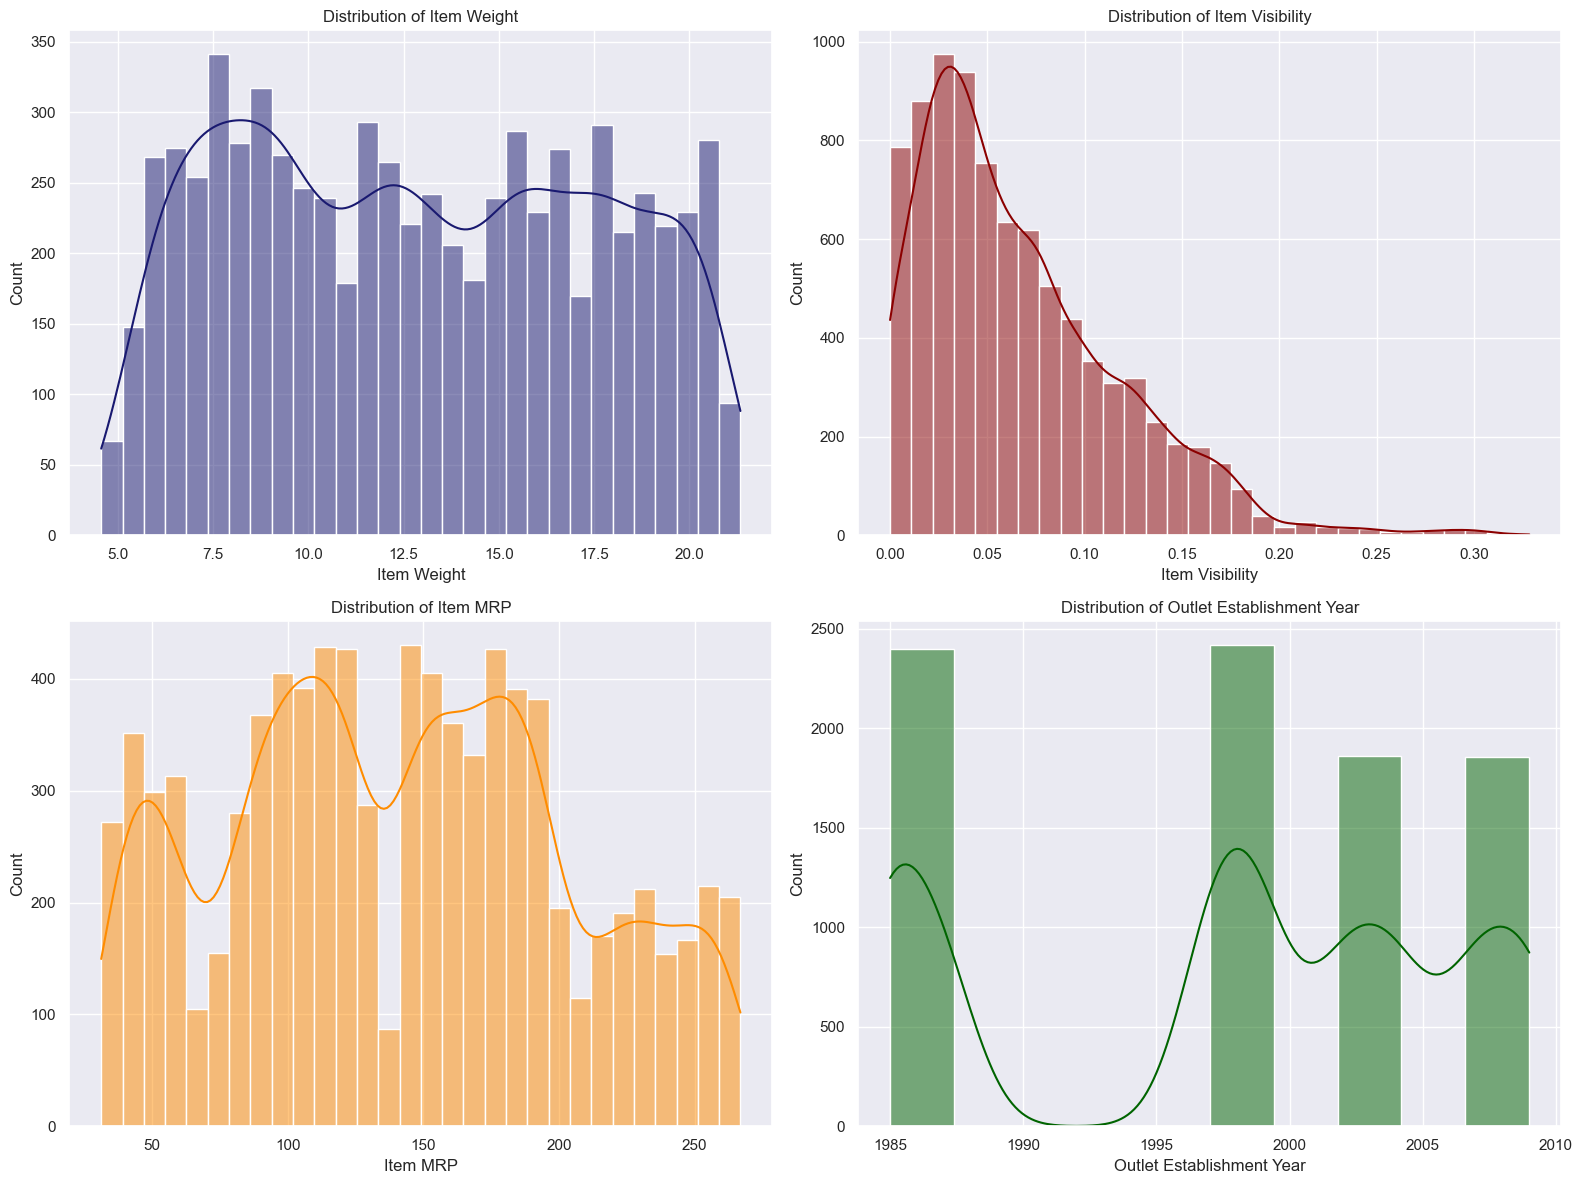

In [27]:

# Set the style of seaborn
sns.set(style="darkgrid")

# Numeric Features: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Feature: Item_Weight
sns.histplot(train_df['Item_Weight'].dropna(), bins=30, kde=True, color='midnightblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Item Weight')
axes[0, 0].set_xlabel('Item Weight')

# Feature: Item_Visibility
sns.histplot(train_df['Item_Visibility'], bins=30, kde=True, color='darkred', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Item Visibility')
axes[0, 1].set_xlabel('Item Visibility')

# Feature: Item_MRP
sns.histplot(train_df['Item_MRP'], bins=30, kde=True, color='darkorange', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Item MRP')
axes[1, 0].set_xlabel('Item MRP')

# Feature: Outlet_Establishment_Year
sns.histplot(train_df['Outlet_Establishment_Year'], bins=10, kde=True, color='darkgreen', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Outlet Establishment Year')
axes[1, 1].set_xlabel('Outlet Establishment Year')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Categorical Features

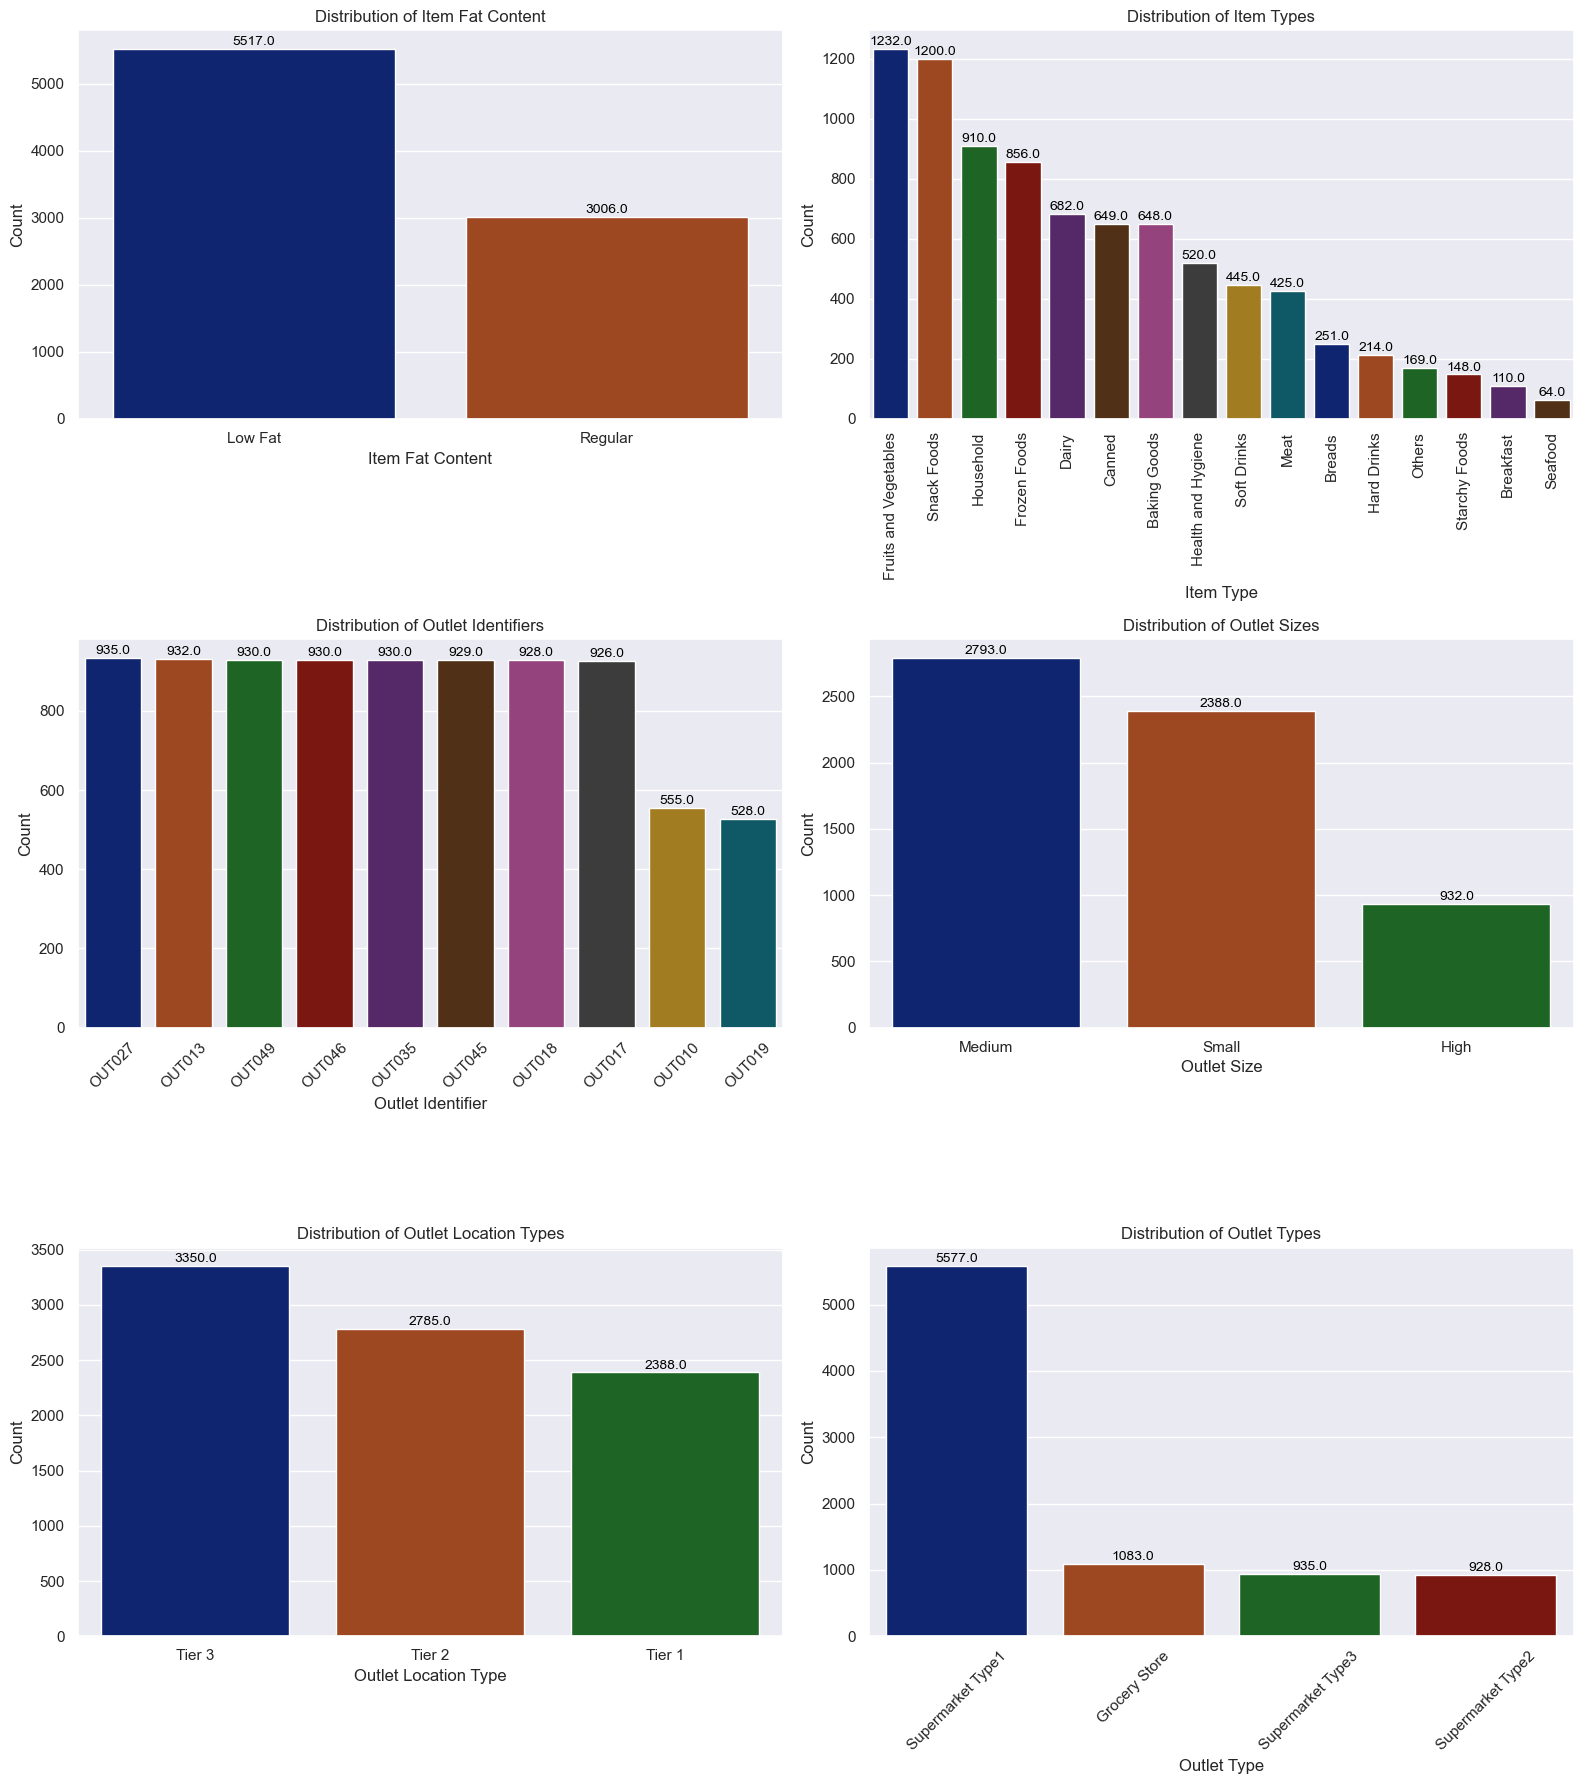

In [28]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Categorical Features: Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Feature: Item_Fat_Content
fat_content_order = train_df['Item_Fat_Content'].value_counts().index
sns.countplot(x='Item_Fat_Content', data=train_df, palette='dark', ax=axes[0, 0], order=fat_content_order)
axes[0, 0].set_title('Distribution of Item Fat Content')
axes[0, 0].set_xlabel('Item Fat Content')
axes[0, 0].set_ylabel('Count')

# Feature: Item_Type
item_type_order = train_df['Item_Type'].value_counts().index
sns.countplot(x='Item_Type', data=train_df, palette='dark', ax=axes[0, 1], order=item_type_order)
axes[0, 1].set_title('Distribution of Item Types')
axes[0, 1].set_xlabel('Item Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)

# Feature: Outlet_Identifier
outlet_identifier_order = train_df['Outlet_Identifier'].value_counts().index
sns.countplot(x='Outlet_Identifier', data=train_df, palette='dark', ax=axes[1, 0], order=outlet_identifier_order)
axes[1, 0].set_title('Distribution of Outlet Identifiers')
axes[1, 0].set_xlabel('Outlet Identifier')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Feature: Outlet_Size
outlet_size_order = train_df['Outlet_Size'].value_counts().index
sns.countplot(x='Outlet_Size', data=train_df, palette='dark', ax=axes[1, 1], order=outlet_size_order)
axes[1, 1].set_title('Distribution of Outlet Sizes')
axes[1, 1].set_xlabel('Outlet Size')
axes[1, 1].set_ylabel('Count')

# Feature: Outlet_Location_Type
outlet_location_order = train_df['Outlet_Location_Type'].value_counts().index
sns.countplot(x='Outlet_Location_Type', data=train_df, palette='dark', ax=axes[2, 0], order=outlet_location_order)
axes[2, 0].set_title('Distribution of Outlet Location Types')
axes[2, 0].set_xlabel('Outlet Location Type')
axes[2, 0].set_ylabel('Count')

# Feature: Outlet_Type
outlet_type_order = train_df['Outlet_Type'].value_counts().index
sns.countplot(x='Outlet_Type', data=train_df, palette='dark', ax=axes[2, 1], order=outlet_type_order)
axes[2, 1].set_title('Distribution of Outlet Types')
axes[2, 1].set_xlabel('Outlet Type')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)

# Add quantities on top of each bar
for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The predominant categories in the dataset are Fruits and Vegetables along with Snack Foods, encompassing a substantial portion of the items. In contrast, Seafood represents the least prevalent category, indicating a relatively lower presence of items falling within this specific product category.

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

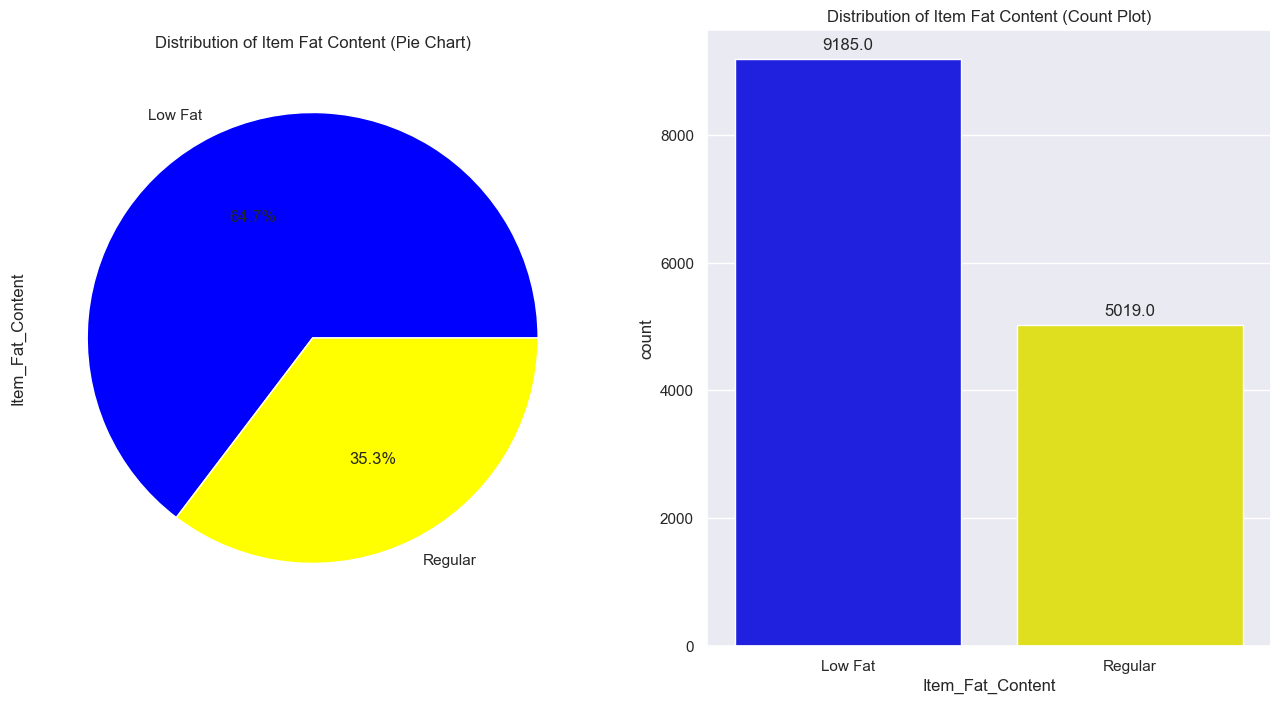

In [29]:
# Set the figure size for better visualization
plt.figure(figsize=(16, 8))

# Plotting Pie Chart for 'Item_Fat_Content' distribution
plt.subplot(1, 2, 1)
combined_df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'yellow'])
plt.title('Distribution of Item Fat Content (Pie Chart)')


# Plotting Count Plot for 'Item_Fat_Content' distribution with counts on top of the bars
plt.subplot(1, 2, 2)
sns.countplot(x='Item_Fat_Content', data=combined_df, palette=['blue', 'yellow'])

# Display the count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Item Fat Content (Count Plot)')

# Display the count of each category
combined_df['Item_Fat_Content'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

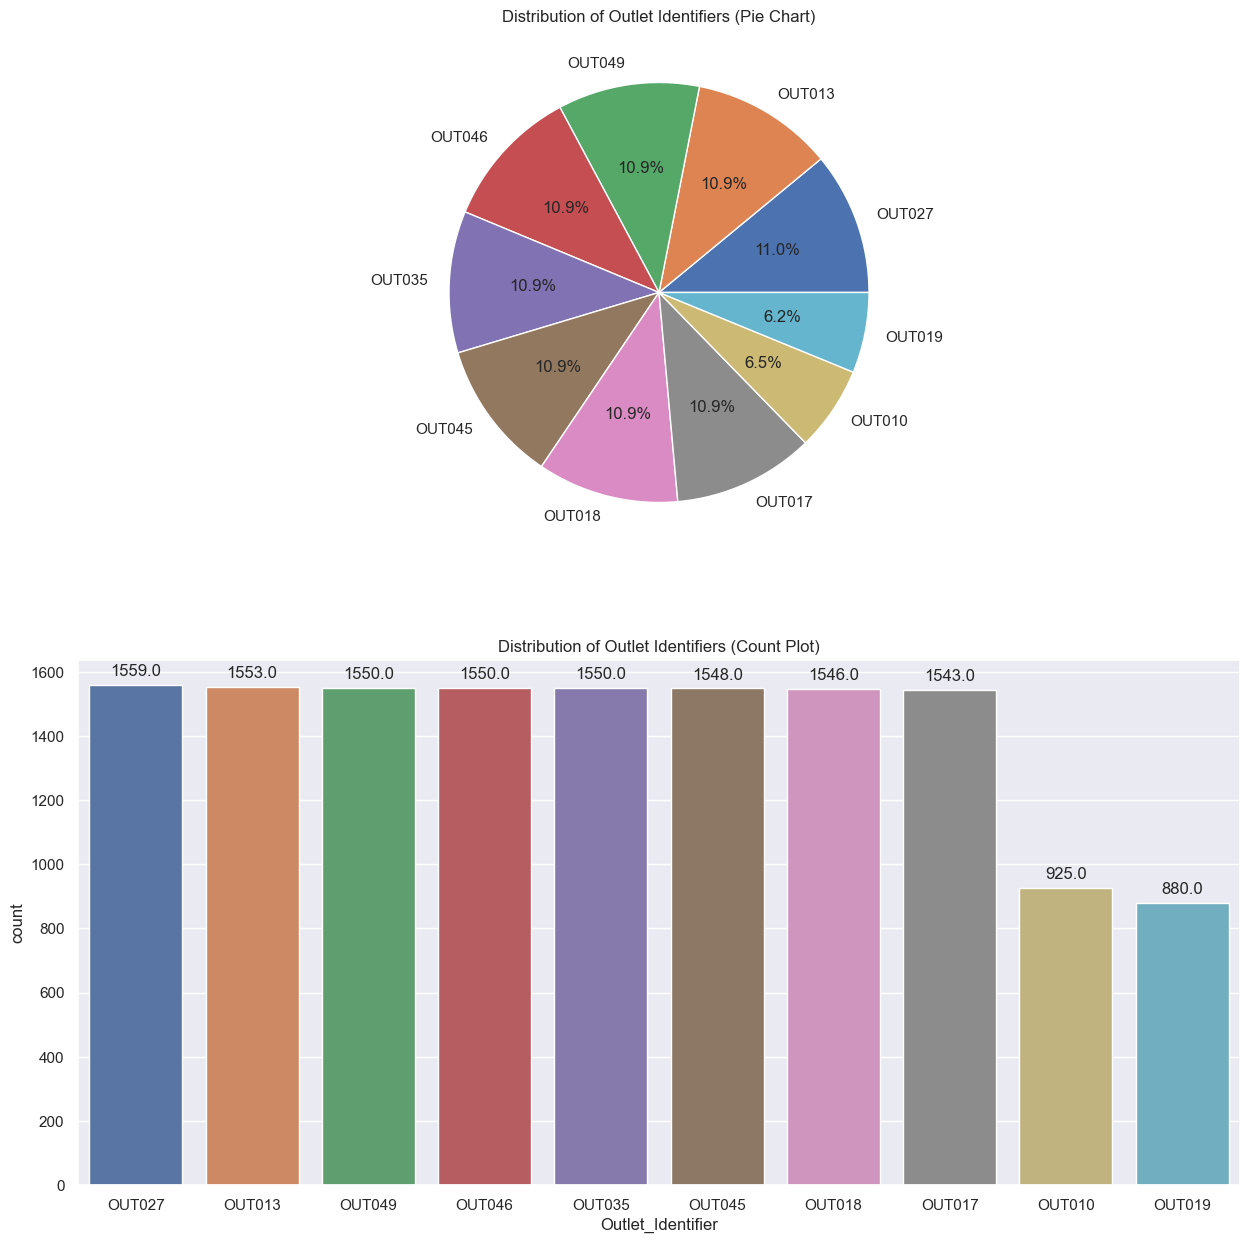

In [30]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 15))

# Plotting Pie Chart for 'Outlet_Identifier' distribution with different colors
plt.subplot(2, 1, 1)
combined_df['Outlet_Identifier'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Outlet Identifiers (Pie Chart)')

# Plotting Count Plot for 'Outlet_Identifier' distribution with counts on top of the bars, arranged from highest to lowest
plt.subplot(2, 1, 2)
sns.countplot(x='Outlet_Identifier', data=combined_df, order=combined_df['Outlet_Identifier'].value_counts().index)

# Display the count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Outlet Identifiers (Count Plot)')

# Display the count of each category
combined_df['Outlet_Identifier'].value_counts()


Among the 10 outlets, the majority exhibit a relatively balanced distribution in terms of their characteristics. However, two outlets, specifically OUT010 and OUT019, stand out as exceptions. These two outlets deviate from the overall balance observed in the remaining outlets.

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

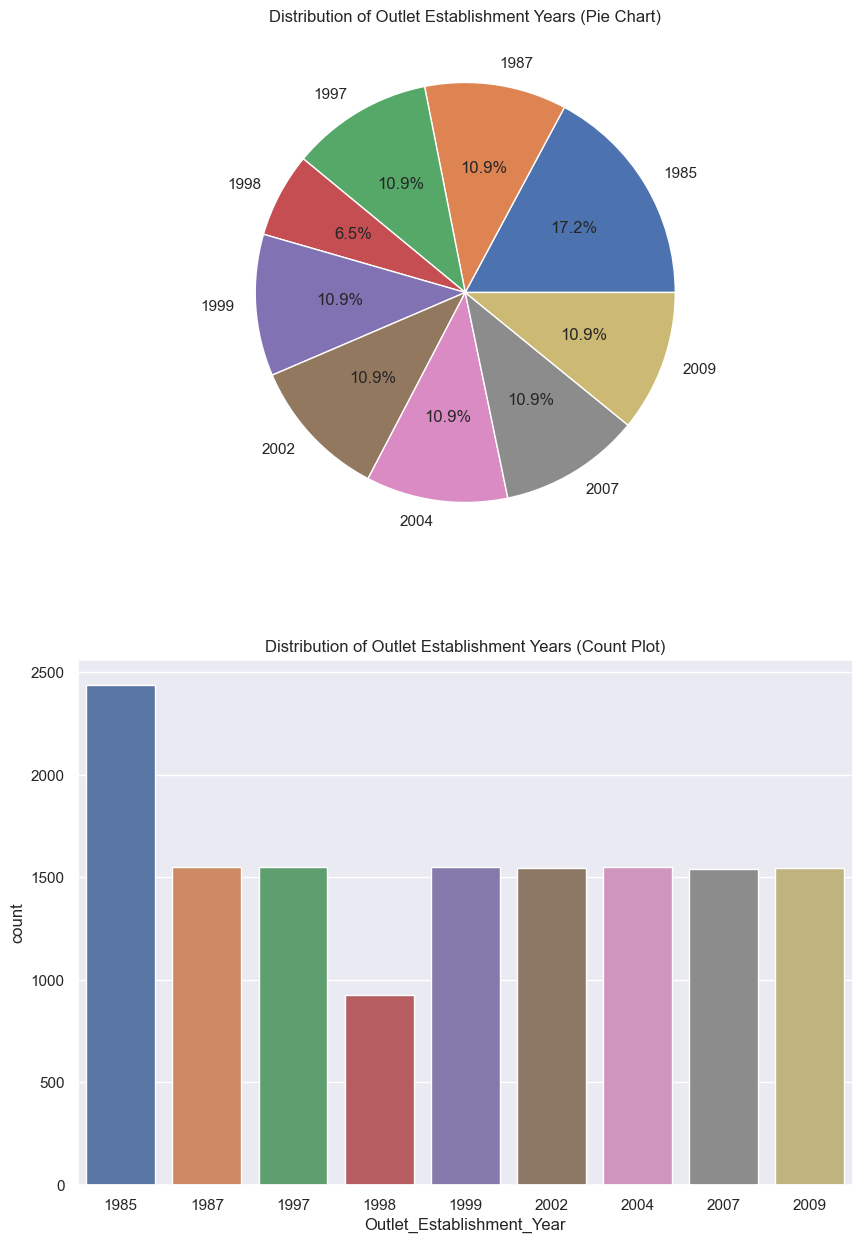

In [31]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 15))

# Plotting Pie Chart for 'Outlet_Establishment_Year' distribution
plt.subplot(2, 1, 1)
combined_df['Outlet_Establishment_Year'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Outlet Establishment Years (Pie Chart)')
plt.ylabel('')

# Plotting Count Plot for 'Outlet_Establishment_Year' distribution
plt.subplot(2, 1, 2)
sns.countplot(x='Outlet_Establishment_Year', data=combined_df)
plt.title('Distribution of Outlet Establishment Years (Count Plot)')

# Display the count of each year
combined_df['Outlet_Establishment_Year'].value_counts()

The data reveals that the majority of outlets were established in the year 1985, indicating a peak in new outlet openings during that period. On the contrary, the year 1998 stands out as having the least number of outlets established, suggesting a comparatively lower trend in outlet openings during that specific year.

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

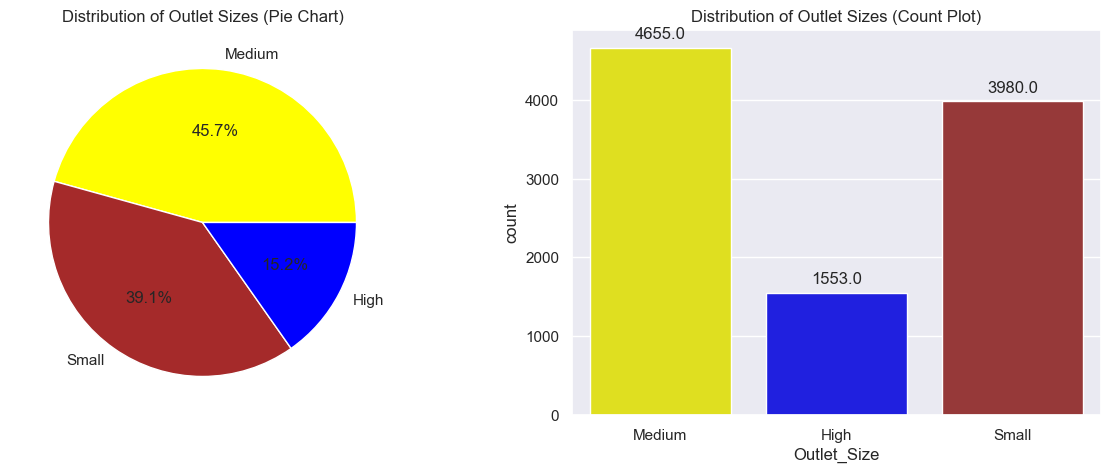

In [32]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 5))

# Plotting Pie Chart for 'Outlet_Size' distribution
plt.subplot(1, 2, 1)
combined_df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%', colors=['yellow', 'brown', 'blue'])
plt.title('Distribution of Outlet Sizes (Pie Chart)')
plt.ylabel('')

# Plotting Count Plot for 'Outlet_Size' distribution with counts on top of the bars
plt.subplot(1, 2, 2)
sns.countplot(x='Outlet_Size', data=combined_df, palette=['yellow', 'blue', 'brown'])

# Display the count on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Outlet Sizes (Count Plot)')

# Display the count of each category
combined_df['Outlet_Size'].value_counts()

The analysis of outlet sizes reveals that a few outlets are categorized as 'High' size, indicating a relatively spacious configuration. In contrast, the majority of outlets fall within the 'Medium' size category, suggesting a prevalent trend towards outlets with a moderate size.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

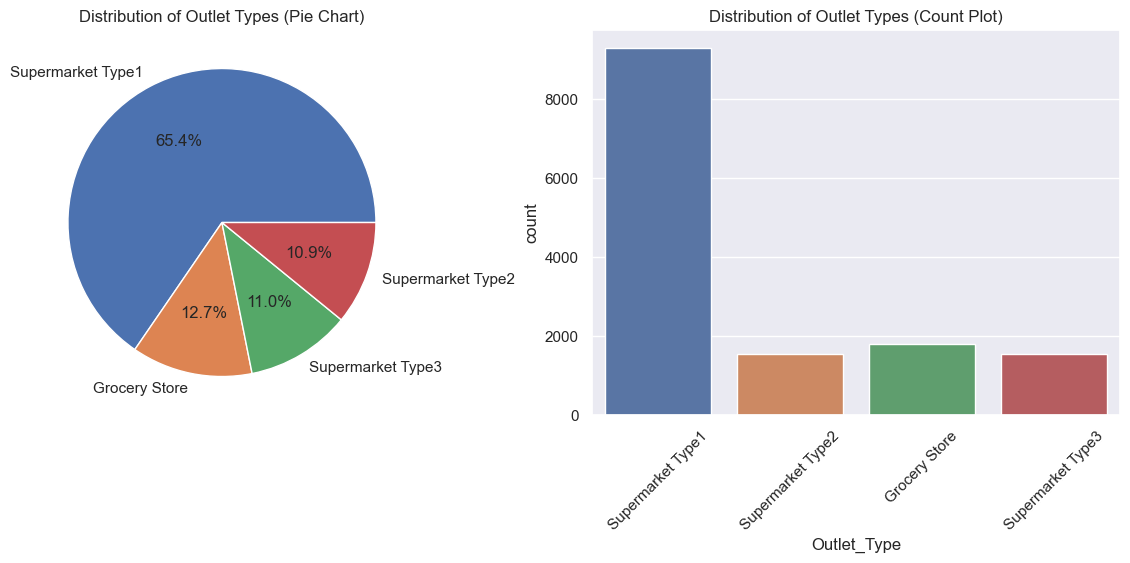

In [33]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 5))

# Plotting Pie Chart for 'Outlet_Type' distribution
plt.subplot(1, 2, 1)
combined_df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Outlet Types (Pie Chart)')
plt.ylabel('')

# Plotting Count Plot for 'Outlet_Type' distribution with counts on top of the bars
plt.subplot(1, 2, 2)
sns.countplot(x='Outlet_Type', data=combined_df)
plt.title('Distribution of Outlet Types (Count Plot)')
plt.xticks(rotation=45)

# Display the count of each category
combined_df['Outlet_Type'].value_counts()

65.4% of the outlets are of supermarket type 1

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

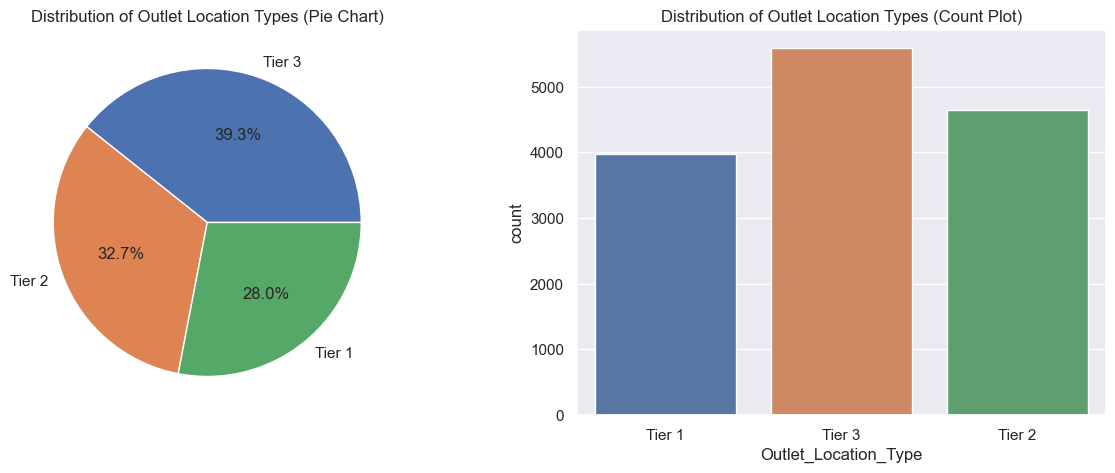

In [34]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 5))

# Plotting Pie Chart for 'Outlet_Location_Type' distribution
plt.subplot(1, 2, 1)
combined_df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Outlet Location Types (Pie Chart)')
plt.ylabel('')

# Plotting Count Plot for 'Outlet_Location_Type' distribution with counts on top of the bars
plt.subplot(1, 2, 2)
sns.countplot(x='Outlet_Location_Type', data=combined_df)
plt.title('Distribution of Outlet Location Types (Count Plot)')

# Display the count of each category
combined_df['Outlet_Location_Type'].value_counts()

The analysis of outlet locations indicates that the majority of stores are situated in cities categorized as Tier 2. This suggests a prevalent concentration of stores in areas classified within this specific tier.

### Bivariate Analysis

### IMPACT OF OUTLET TYPE ON SALES



Text(0.5, 1.0, 'Outlet Type vs Outlet Sales in Train DataFrame')

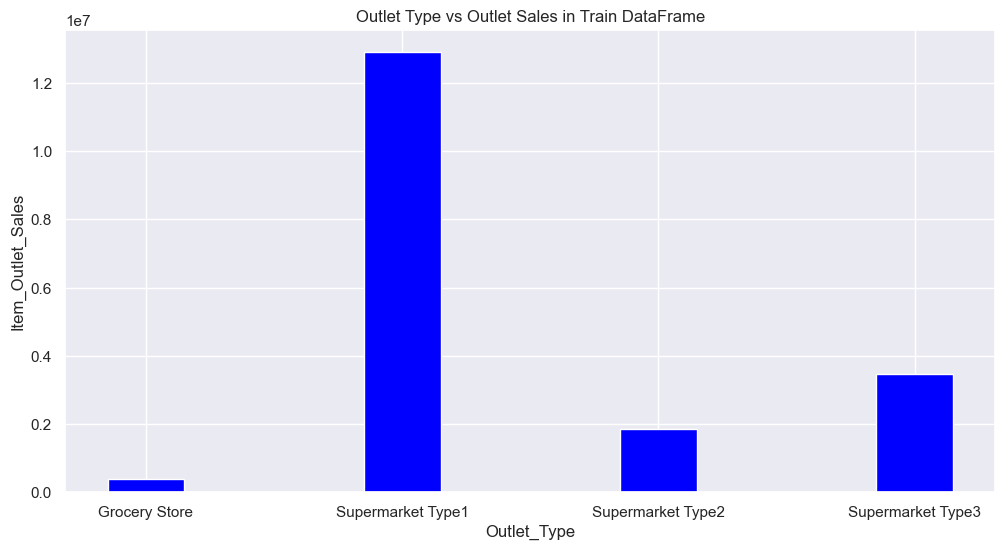

In [35]:
# Set the figure size for better visualization
plt.figure(figsize=(12, 6))

# Group by 'Outlet_Type' and calculate the sum of 'Item_Outlet_Sales' in train_df
sales_by_outlet_type_train = train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()

# Define the order of store types
store_types_order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']

# Plot a bar chart to visualize the relationship between 'Outlet_Type' and 'Item_Outlet_Sales'
plt.bar(store_types_order, sales_by_outlet_type_train, width=0.3, color='blue')

# Set labels and title for better understanding
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Type vs Outlet Sales in Train DataFrame')

### IMPACT OF Item_Fat_Content ON OUTLET SALES

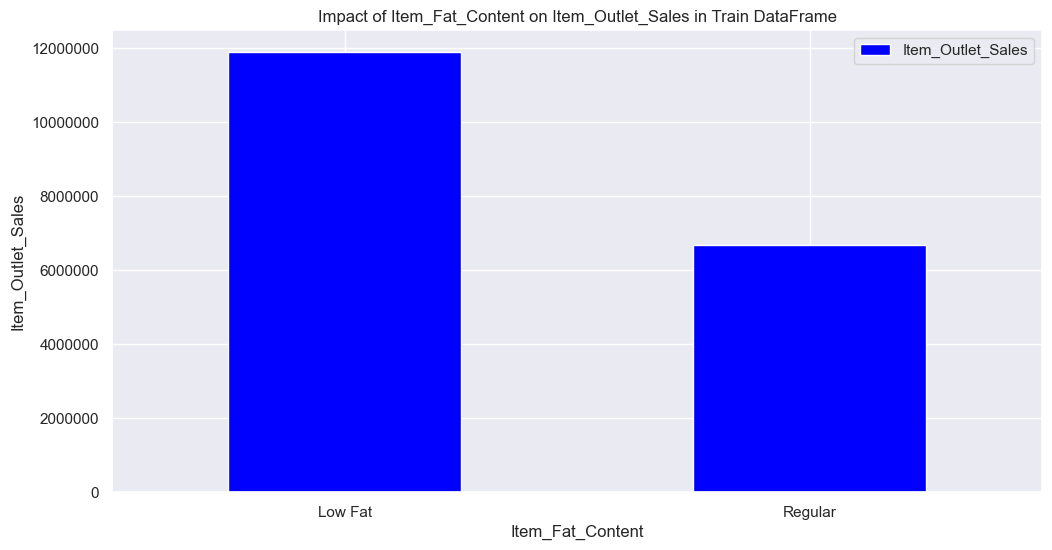

In [36]:
# Create a pivot table for 'Item_Fat_Content' and its impact on 'Item_Outlet_Sales' in train_df
outlet_type_pivot_train = train_df.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.sum)

# Plot a bar chart to visualize the impact
outlet_type_pivot_train.plot(kind='bar', color='blue', figsize=(12, 6))

# Set labels and title for better understanding
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales in Train DataFrame")
plt.xticks(rotation=0)
plt.ticklabel_format(axis="y", style="plain")

# Display the plot
plt.show()

### IMPACT OF OUTLET SIZE ON OUTLET SALES

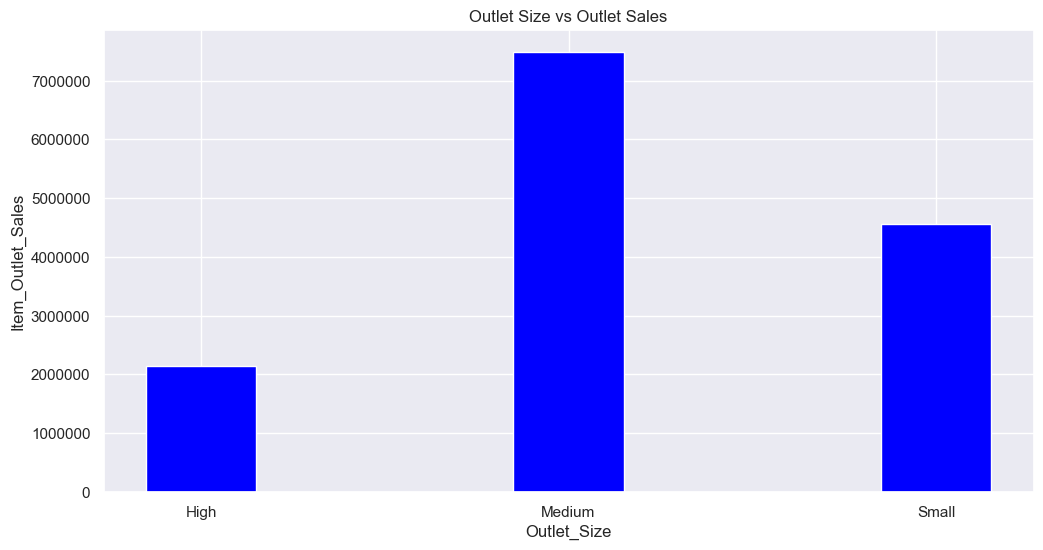

In [37]:
# Set the figure size for better visualization
plt.figure(figsize=(12, 6))

# Group by 'Outlet_Size' and calculate the sum of 'Item_Outlet_Sales' in data3
sales_by_outlet_size = train_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()

# Define the order of outlet sizes
size_order = ['High', 'Medium', 'Small']

# Plot a bar chart to visualize the relationship between 'Outlet_Size' and 'Item_Outlet_Sales'
plt.bar(size_order, sales_by_outlet_size, color='blue', width=0.3)

# Set labels and title for better understanding
plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Outlet Size vs Outlet Sales')

# Format y-axis labels to plain style
plt.ticklabel_format(axis="y", style="plain")

# Display the plot
plt.show()

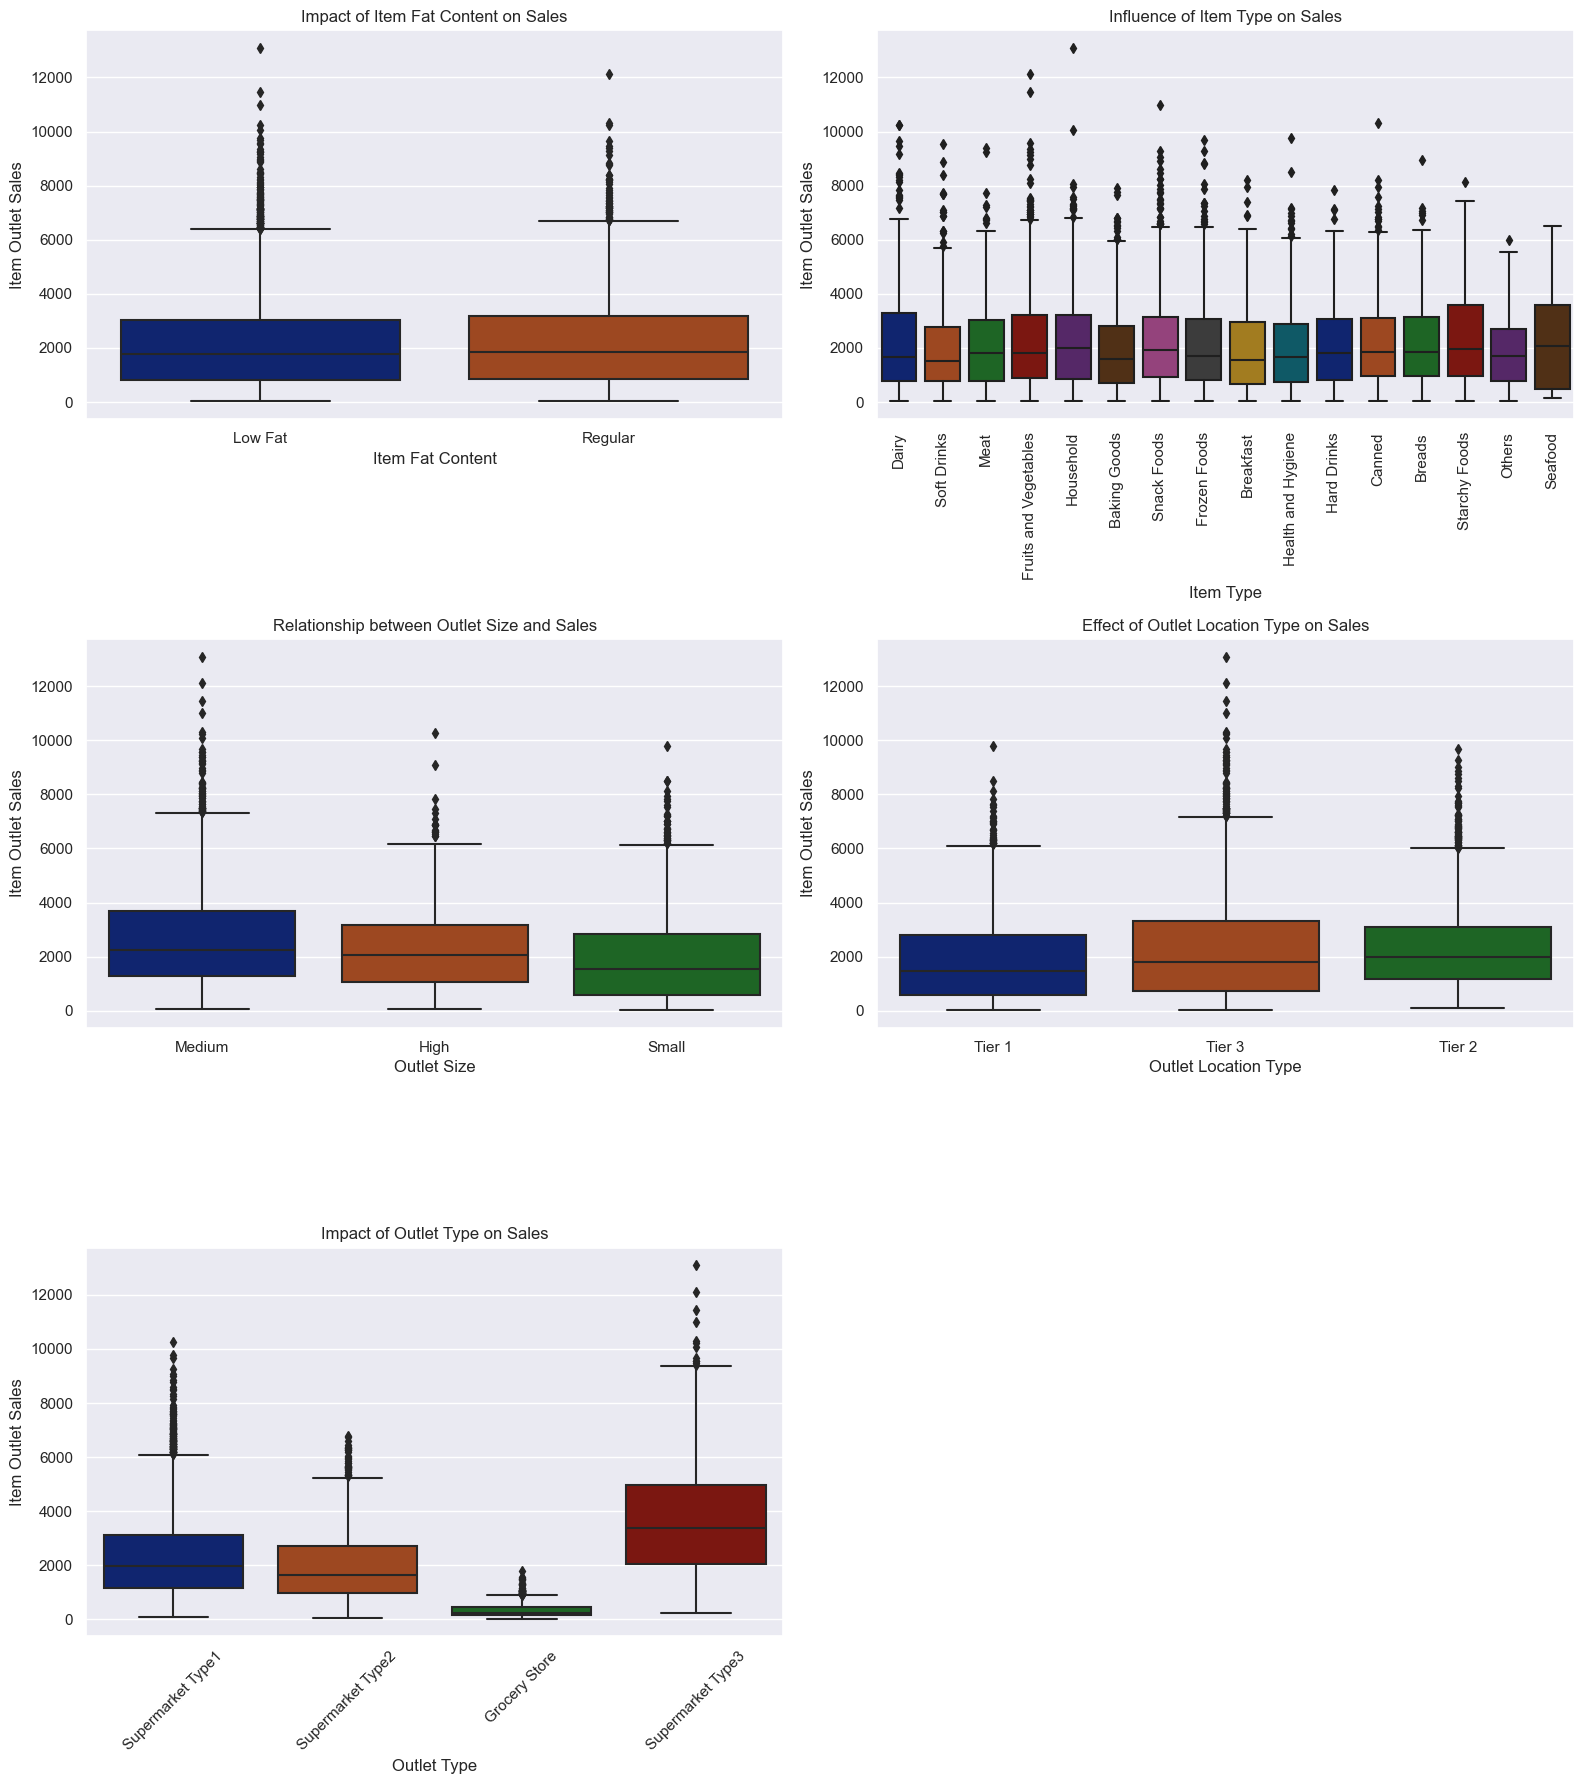

In [38]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Bivariate Analysis: Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type vs. Item_Outlet_Sales

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Bivariate Analysis: Item_Fat_Content vs. Item_Outlet_Sales
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[0, 0])
axes[0, 0].set_title('Impact of Item Fat Content on Sales')
axes[0, 0].set_xlabel('Item Fat Content')
axes[0, 0].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Item_Type vs. Item_Outlet_Sales
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[0, 1])
axes[0, 1].set_title('Influence of Item Type on Sales')
axes[0, 1].set_xlabel('Item Type')
axes[0, 1].set_ylabel('Item Outlet Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

# Bivariate Analysis: Outlet_Size vs. Item_Outlet_Sales
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Outlet Size and Sales')
axes[1, 0].set_xlabel('Outlet Size')
axes[1, 0].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Outlet_Location_Type vs. Item_Outlet_Sales
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[1, 1])
axes[1, 1].set_title('Effect of Outlet Location Type on Sales')
axes[1, 1].set_xlabel('Outlet Location Type')
axes[1, 1].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Outlet_Type vs. Item_Outlet_Sales
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[2, 0])
axes[2, 0].set_title('Impact of Outlet Type on Sales')
axes[2, 0].set_xlabel('Outlet Type')
axes[2, 0].set_ylabel('Item Outlet Sales')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

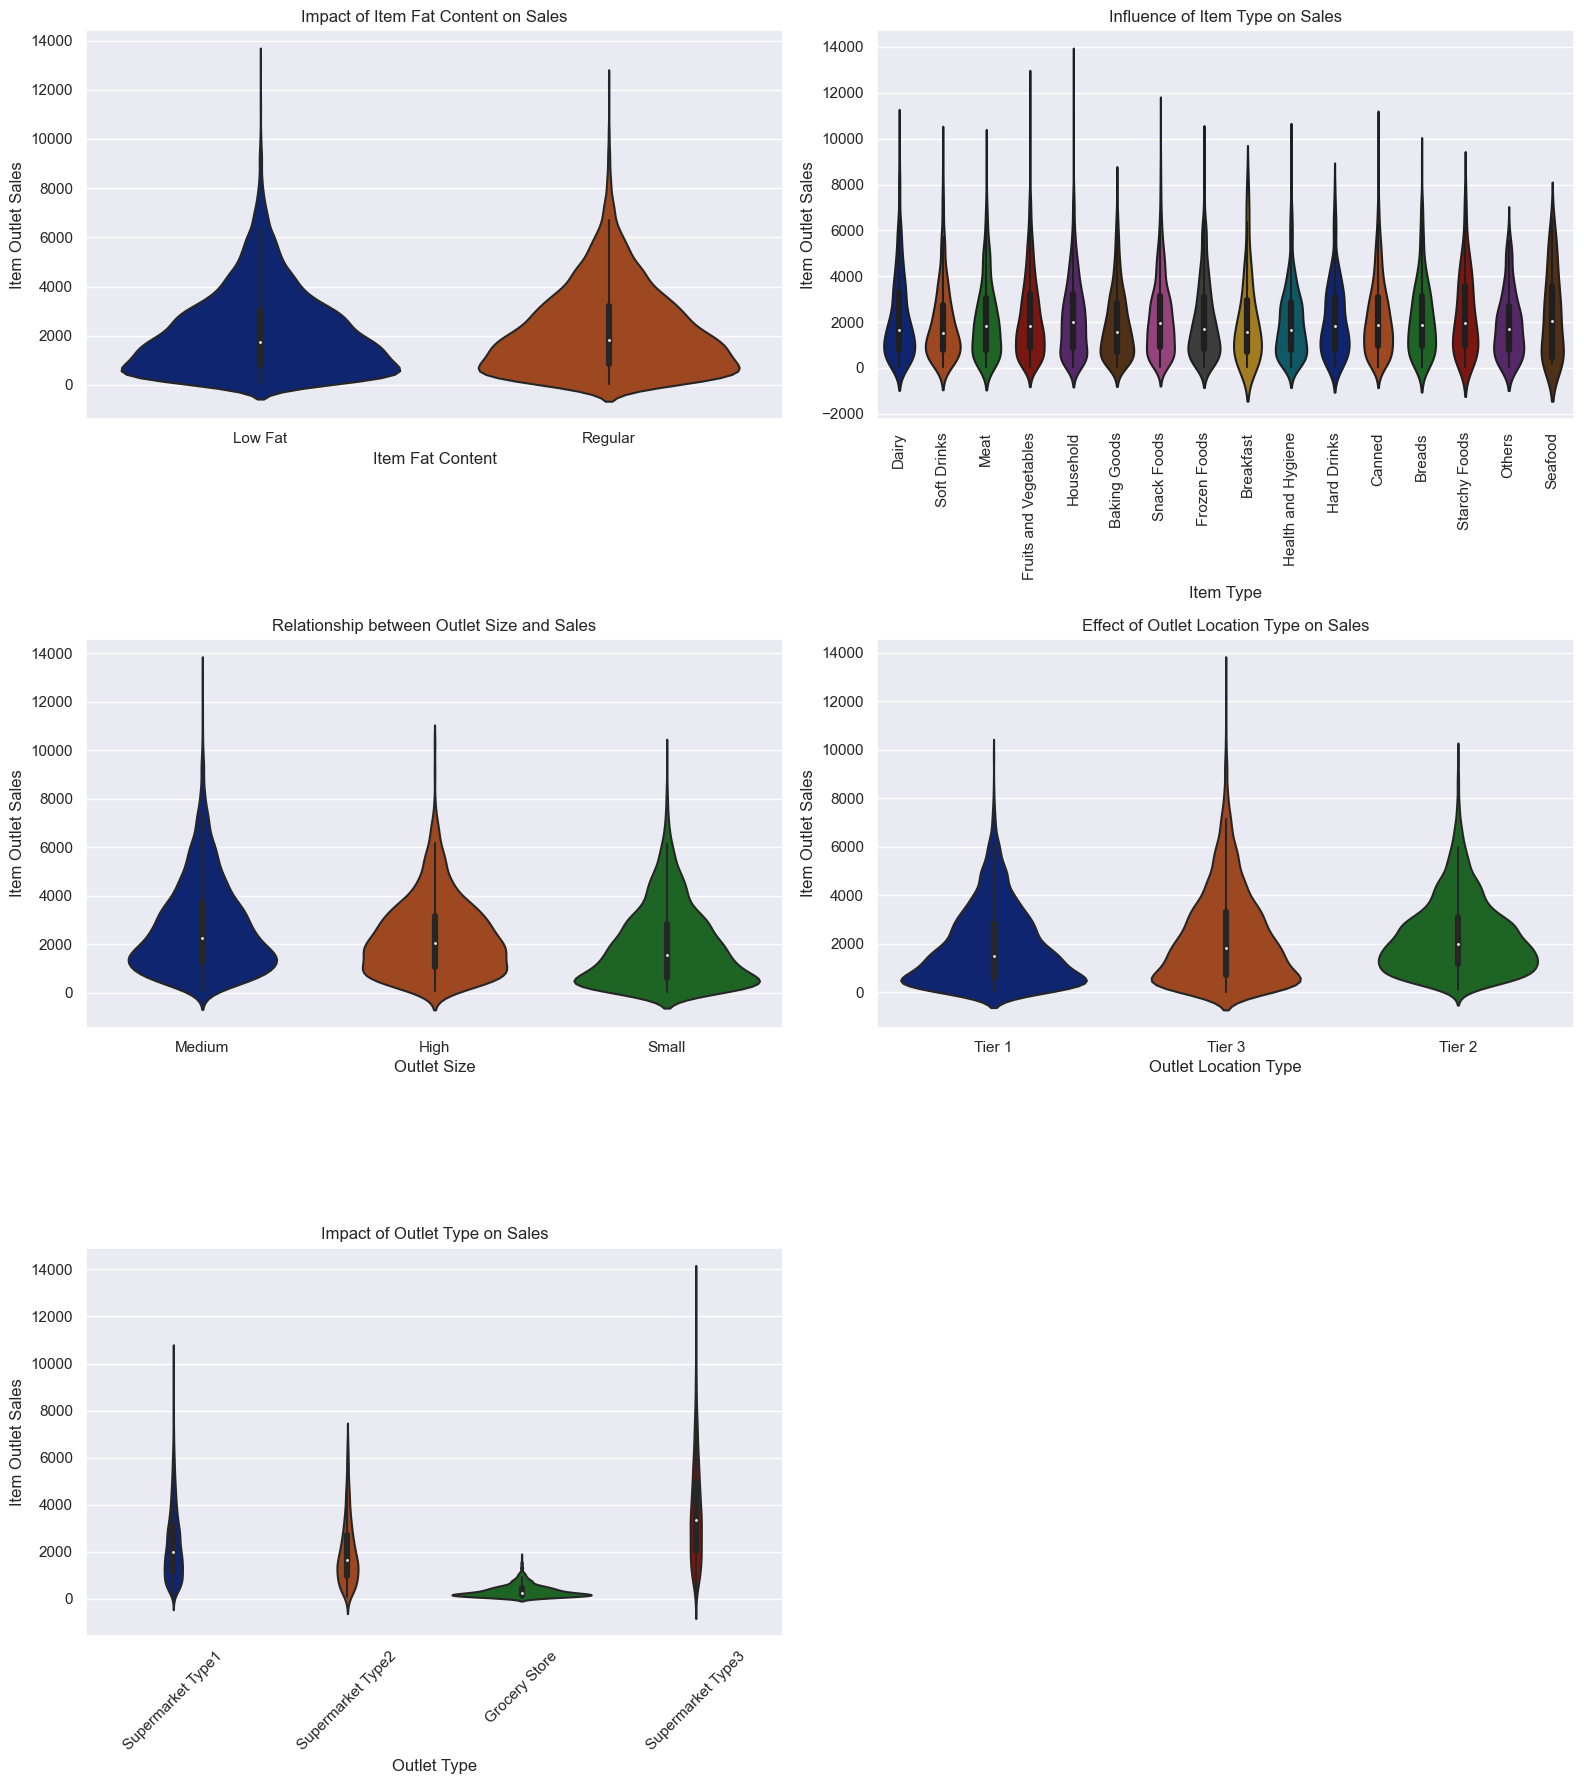

In [39]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Bivariate Analysis: Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type vs. Item_Outlet_Sales

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))

# Bivariate Analysis: Item_Fat_Content vs. Item_Outlet_Sales
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[0, 0])
axes[0, 0].set_title('Impact of Item Fat Content on Sales')
axes[0, 0].set_xlabel('Item Fat Content')
axes[0, 0].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Item_Type vs. Item_Outlet_Sales
sns.violinplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[0, 1])
axes[0, 1].set_title('Influence of Item Type on Sales')
axes[0, 1].set_xlabel('Item Type')
axes[0, 1].set_ylabel('Item Outlet Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

# Bivariate Analysis: Outlet_Size vs. Item_Outlet_Sales
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[1, 0])
axes[1, 0].set_title('Relationship between Outlet Size and Sales')
axes[1, 0].set_xlabel('Outlet Size')
axes[1, 0].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Outlet_Location_Type vs. Item_Outlet_Sales
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[1, 1])
axes[1, 1].set_title('Effect of Outlet Location Type on Sales')
axes[1, 1].set_xlabel('Outlet Location Type')
axes[1, 1].set_ylabel('Item Outlet Sales')

# Bivariate Analysis: Outlet_Type vs. Item_Outlet_Sales
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df, palette='dark', ax=axes[2, 0])
axes[2, 0].set_title('Impact of Outlet Type on Sales')
axes[2, 0].set_xlabel('Outlet Type')
axes[2, 0].set_ylabel('Item Outlet Sales')
axes[2, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

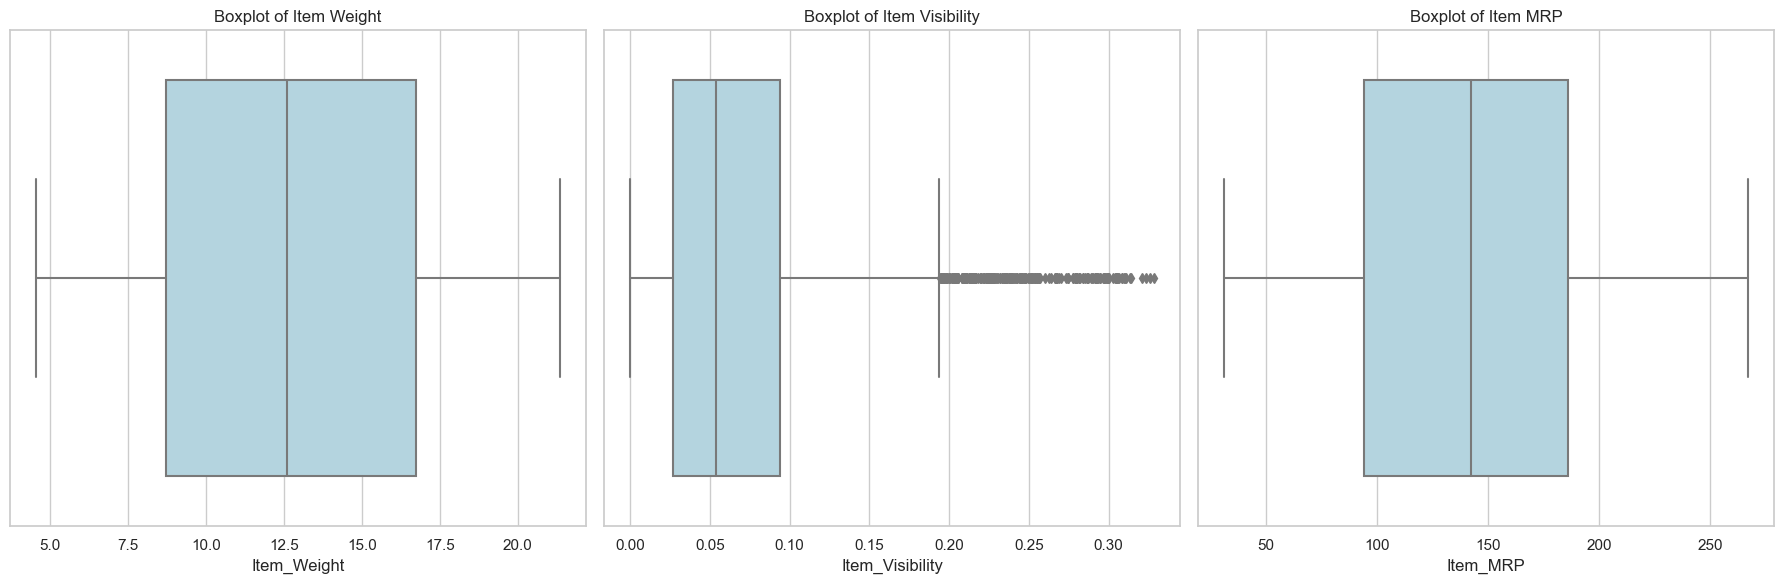

In [40]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Numeric Features: Item_Weight, Item_Visibility, Item_MRP

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Feature: Item_Weight
sns.boxplot(x='Item_Weight', data=combined_df, ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Item Weight')

# Feature: Item_Visibility
sns.boxplot(x='Item_Visibility', data=combined_df, ax=axes[1], color='lightblue')
axes[1].set_title('Boxplot of Item Visibility')

# Feature: Item_MRP
sns.boxplot(x='Item_MRP', data=combined_df, ax=axes[2], color='lightblue')
axes[2].set_title('Boxplot of Item MRP')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

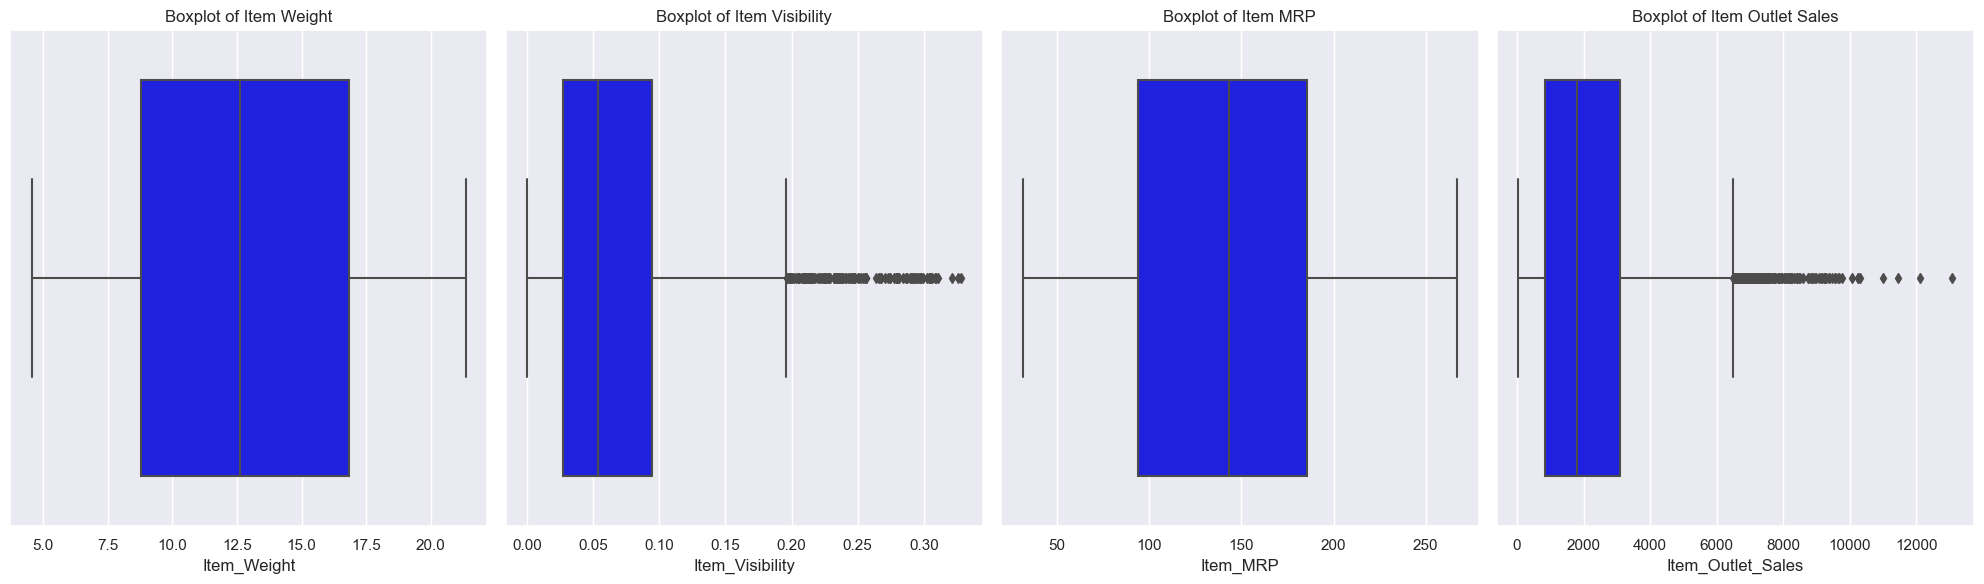

In [41]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Numeric Features: Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Feature: Item_Weight
sns.boxplot(x='Item_Weight', data=train_df, ax=axes[0], color='blue')
axes[0].set_title('Boxplot of Item Weight')

# Feature: Item_Visibility
sns.boxplot(x='Item_Visibility', data=train_df, ax=axes[1], color='blue')
axes[1].set_title('Boxplot of Item Visibility')

# Feature: Item_MRP
sns.boxplot(x='Item_MRP', data=train_df, ax=axes[2], color='blue')
axes[2].set_title('Boxplot of Item MRP')

# Feature: Item_Outlet_Sales
sns.boxplot(x='Item_Outlet_Sales', data=train_df, ax=axes[3], color='blue')
axes[3].set_title('Boxplot of Item Outlet Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Multivariate 

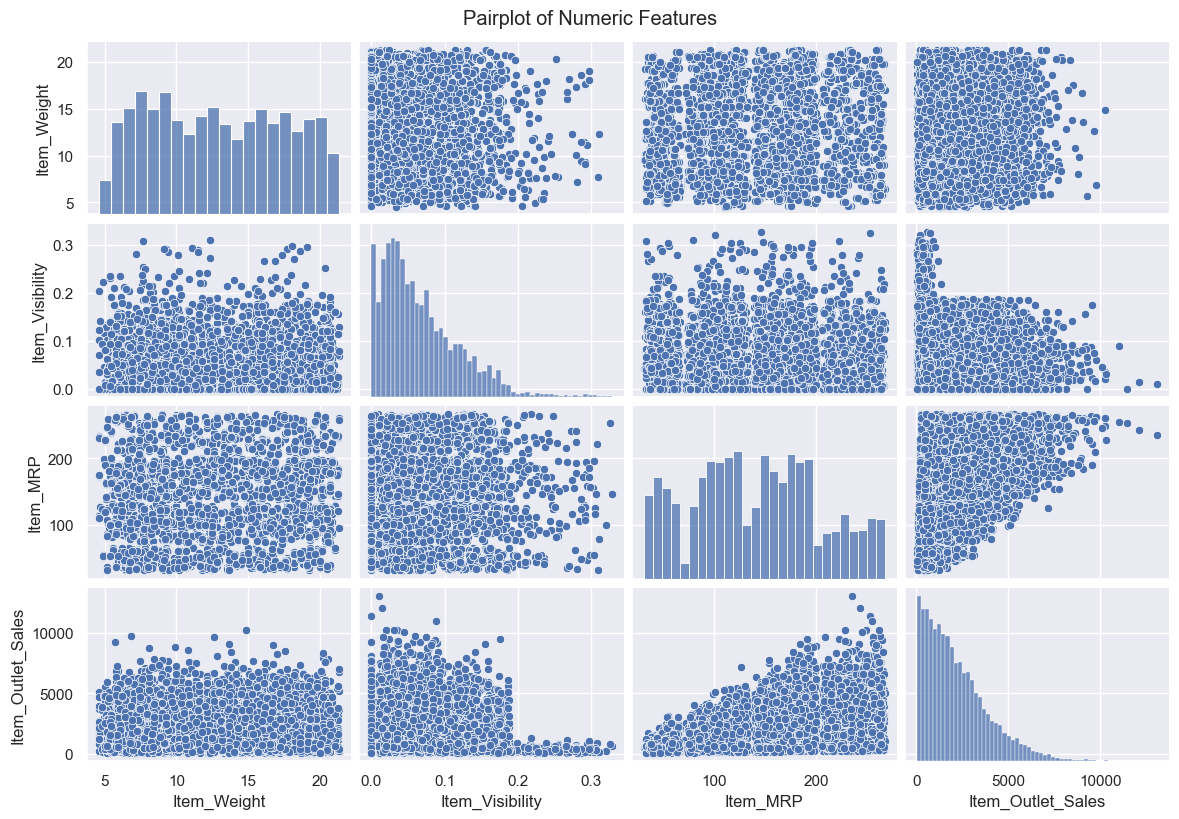

In [42]:
# Set the style of seaborn
sns.set(style="darkgrid")

# Select relevant numeric features for pairplot
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Create pairplot
sns.pairplot(train_df[numeric_features], height=2, aspect=1.5)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

###  Analyze Correlation Matrix

In [43]:
# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Display the correlation coefficients with respect to 'Item_Outlet_Sales'
corr_item_outlet_sales = corr_matrix['Item_Outlet_Sales']
print(corr_item_outlet_sales)

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


We observe a notable correlation between 'item_mrp' and 'item_outlet_sales', while the remaining correlations seem less significant.

Due to a substantial correlation between 'item_weight' and the target variable, we visualize this relationship graphically for better understanding.

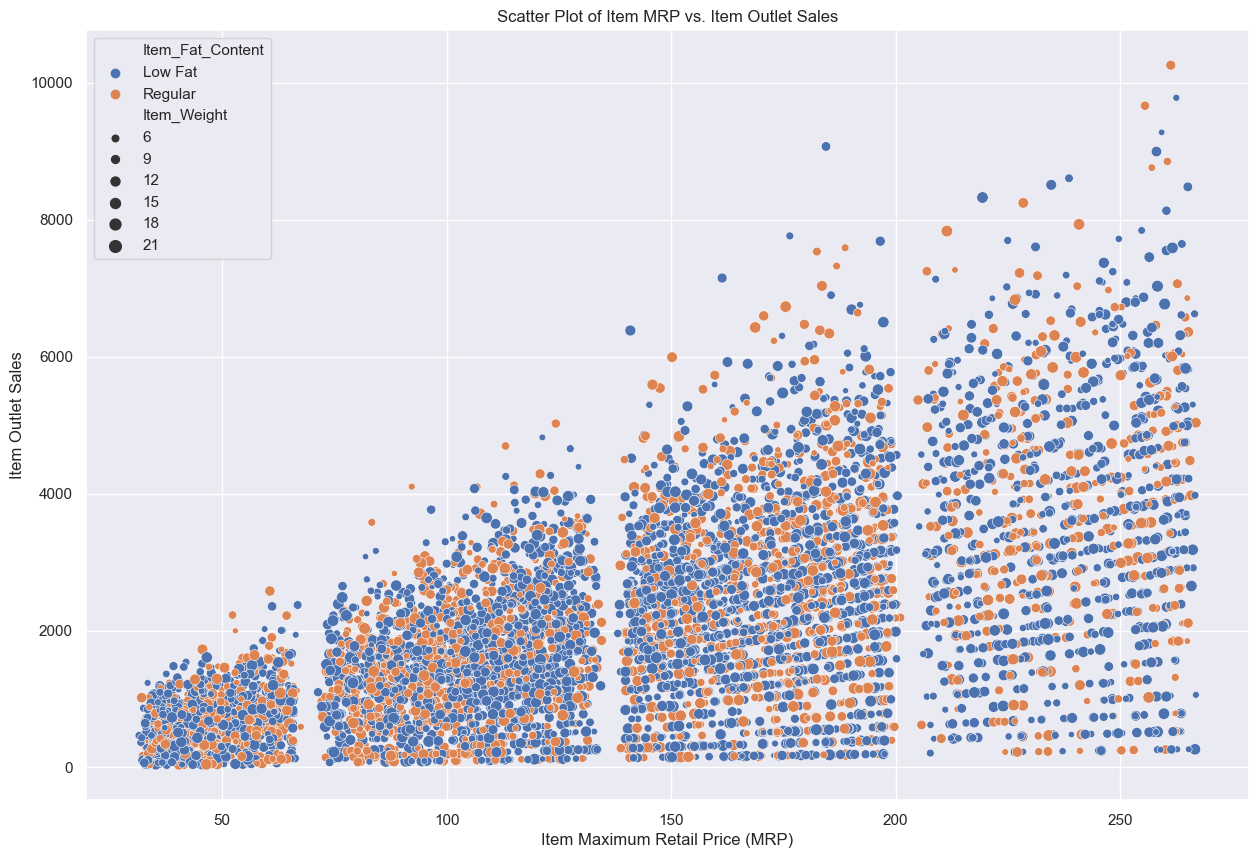

In [44]:
# Set the figure size for better visualization
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

# Create a scatter plot
sns.scatterplot(
    x='Item_MRP',              # X-axis: Item Maximum Retail Price
    y='Item_Outlet_Sales',     # Y-axis: Item Outlet Sales
    hue='Item_Fat_Content',    # Color by Item Fat Content
    size='Item_Weight',        # Marker size by Item Weight
    data=train_df               # Use the train_df DataFrame
)

# Set the title of the plot
plt.title('Scatter Plot of Item MRP vs. Item Outlet Sales')

# Set the labels for the axes
plt.xlabel('Item Maximum Retail Price (MRP)')
plt.ylabel('Item Outlet Sales')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [45]:
train_df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

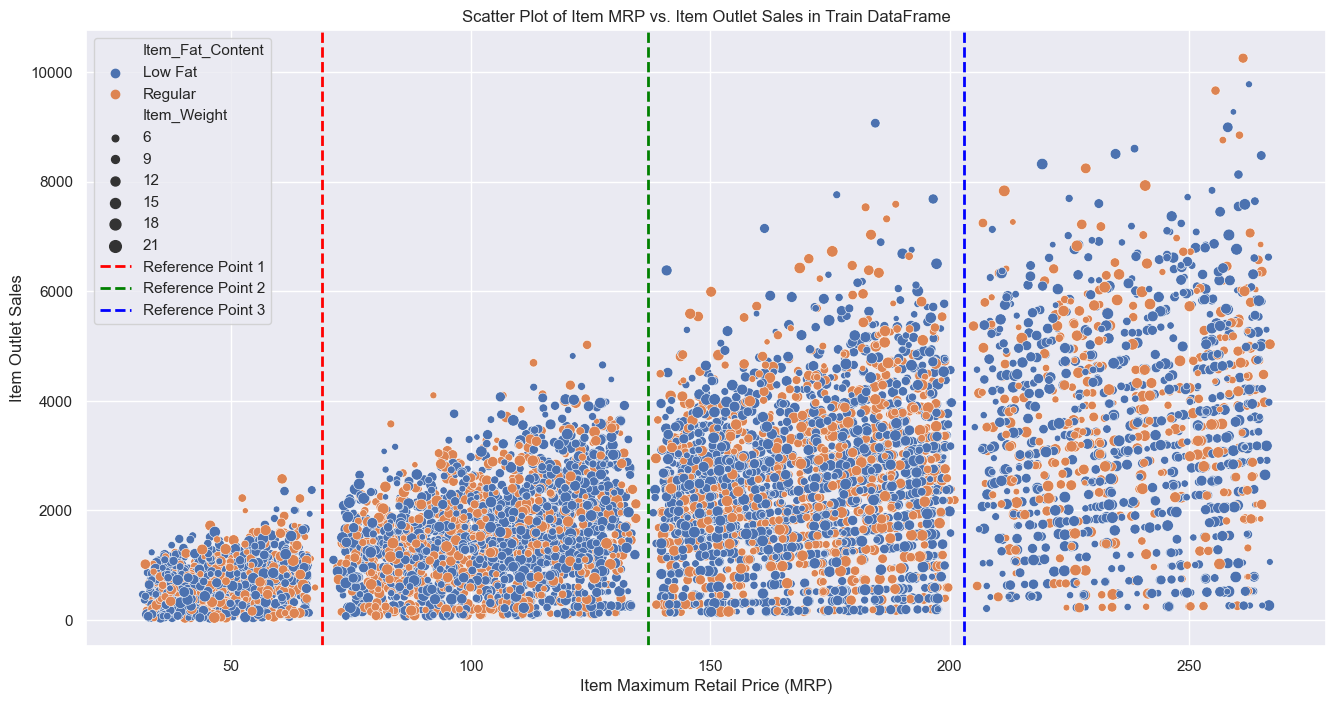

In [46]:
# Set the subplot for better visualization
fig, axes = plt.subplots(1, 1, figsize=(16, 8))

# Create a scatter plot for 'Item_MRP' vs 'Item_Outlet_Sales' with color-coded points by 'Item_Fat_Content' and marker size by 'Item_Weight'
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Fat_Content', size='Item_Weight', data=train_df)

# Add vertical lines for reference points
plt.axvline(x=69, color='red', linestyle='--', linewidth=2, label='Reference Point 1')
plt.axvline(x=137, color='green', linestyle='--', linewidth=2, label='Reference Point 2')
plt.axvline(x=203, color='blue', linestyle='--', linewidth=2, label='Reference Point 3')

# Set labels and title for better understanding
plt.xlabel('Item Maximum Retail Price (MRP)')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter Plot of Item MRP vs. Item Outlet Sales in Train DataFrame')

# Show legend
plt.legend()

# Display the plot
plt.show()

### Heatmap

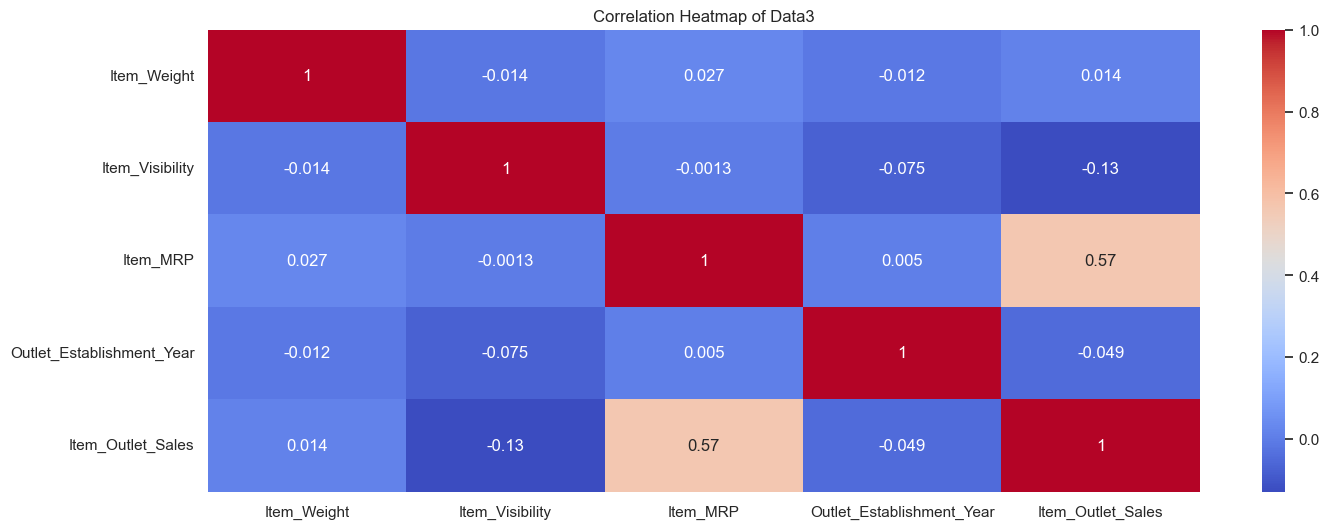

In [47]:
# Set the figure size for better visualization
plt.figure(figsize=(16, 6))

# Create a heatmap to visualize the correlation matrix of 'train_df'
# Light blue shades represent stronger correlations, and darker shades represent weaker correlations
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

# Add title to the heatmap
plt.title('Correlation Heatmap of Data3')

# Display the plot
plt.show()

### IMPACT OF Item_Fat_Content ON OUTLET SALES

## Data Cleaning


### Handling Missing values

In [48]:
# Calculate percentage of missing values for each column
missing_percentage = combined_df.isnull().mean() * 100

# Calculate number of missing values for each column
missing_count = combined_df.isnull().sum()

# Create a DataFrame to display results
missing_info_df = pd.DataFrame({
    'Column': combined_df.columns,
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

# Display the DataFrame
missing_info_df

Column  Missing Count  \
Outlet_Size                              Outlet_Size           4016   
Item_Weight                              Item_Weight           2439   
Item_Identifier                      Item_Identifier              0   
Item_Fat_Content                    Item_Fat_Content              0   
Item_Visibility                      Item_Visibility              0   
Item_Type                                  Item_Type              0   
Item_MRP                                    Item_MRP              0   
Outlet_Identifier                  Outlet_Identifier              0   
Outlet_Establishment_Year  Outlet_Establishment_Year              0   
Outlet_Location_Type            Outlet_Location_Type              0   
Outlet_Type                              Outlet_Type              0   
Item_Outlet_Sales                  Item_Outlet_Sales              0   
source                                        source              0   

                           Missing Percentage  
Outlet_Size                         28.273726  
Item_Weight                         17.171219  
Item_Identifier                      0.000000  
Item_Fat_Content                     0.000000  
Item_Visibility                      0.000000  
Item_Type                            0.000000  
Item_MRP                             0.000000  
Outlet_Identifier                    0.000000  
Outlet_Establishment_Year            0.000000  
Outlet_Location_Type                 0.000000  
Outlet_Type                          0.000000  
Item_Outlet_Sales                    0.000000  
source                               0.000000

### Analysis of Missing Values

**Item_Outlet_Sales:**
- **Missing Count:** 5681
- **Missing Percentage:** 39.995776%
- **My Comment:** The `Item_Outlet_Sales` column has a significant number of missing values (approximately 40%). Since this is the target variable for this prediction task, imputing or dropping these rows may not be suitable, as it would affect the integrity of the training data. I am considering leaving these missing values as-is for the test set, as they correspond to the samples I want to predict.

**Outlet_Size:**
- **Missing Count:** 4016
- **Missing Percentage:** 28.273726%
- **My Comment:** The `Outlet_Size` column has a moderate number of missing values. I will  impute these missing values using the mode (most frequent category) since it's a categorical variable. 

**Item_Weight:**
- **Missing Count:** 2439
- **Missing Percentage:** 17.171219%
- **My Comment:** The `Item_Weight` column has a moderate number of missing values. I am considering imputing these missing values using the mean or median. However, I will assess the impact on my analysis and model performance.

In [49]:
combined_df['Outlet_Size'].fillna(combined_df['Outlet_Size'].mode()[0], inplace=True)

In [50]:
# Impute missing values in the 'Item_Weight' column with the mean value
# This is done to handle moderate missing values in the 'Item_Weight' feature
# Using the mean helps maintain the overall distribution of weights in the dataset
combined_df['Item_Weight'].fillna(combined_df['Item_Weight'].mean(), inplace=True)

In [51]:
# Check for remaining missing values after imputation
combined_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [52]:
# Save the modified dataset as 'final_df'
combined_df.to_csv('dataset/final_df.csv', index=False)

In [53]:
final = pd.read_csv('dataset/final_df.csv')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

### Statistical Description of the Data

In [54]:
final.describe()

Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  14204.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.234226         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        9.300000         0.027036     94.012000                1987.000000   
50%       12.792854         0.054021    142.247000                1999.000000   
75%       16.000000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count       14204.000000  
mean         1308.865489  
std          1699.791423  
min             0.000000  
25%             0.000000  
50%           559.272000  
75%          2163.184200  
max         13086.964800

### Feature Engineering

In [55]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()
# Assuming df is your DataFrame
obj_features = [feature for feature in final.columns if final[feature].dtypes == 'O' and feature != 'source']

# Display the list of object-type features
print(obj_features)


['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [56]:
for feature in obj_features:
    final[feature] = encoder.fit_transform(final[feature].values.reshape(-1, 1))

# Display the DataFrame after encoding
final.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0            156.0         9.30               0.0         0.016047        4.0   
1              8.0         5.92               1.0         0.019278       14.0   
2            662.0        17.50               0.0         0.016760       10.0   
3           1121.0        19.20               1.0         0.000000        6.0   
4           1297.0         8.93               0.0         0.000000        9.0   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                9.0                       1999          1.0   
1   48.2692                3.0                       2009          1.0   
2  141.6180                9.0                       1999          1.0   
3  182.0950                0.0                       1998          1.0   
4   53.8614                1.0                       1987          0.0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales source  
0                   0.0          1.0          3735.1380  train  
1                   2.0          2.0           443.4228  train  
2                   0.0          1.0          2097.2700  train  
3                   2.0          0.0           732.3800  train  
4                   2.0          1.0           994.7052  train

In [57]:
print(final.dtypes)

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
dtype: object


All columns in the DataFrame, except for the 'source' column, have been transformed into the float data type.

- Removing outliers from item visibility column

(14031, 13)


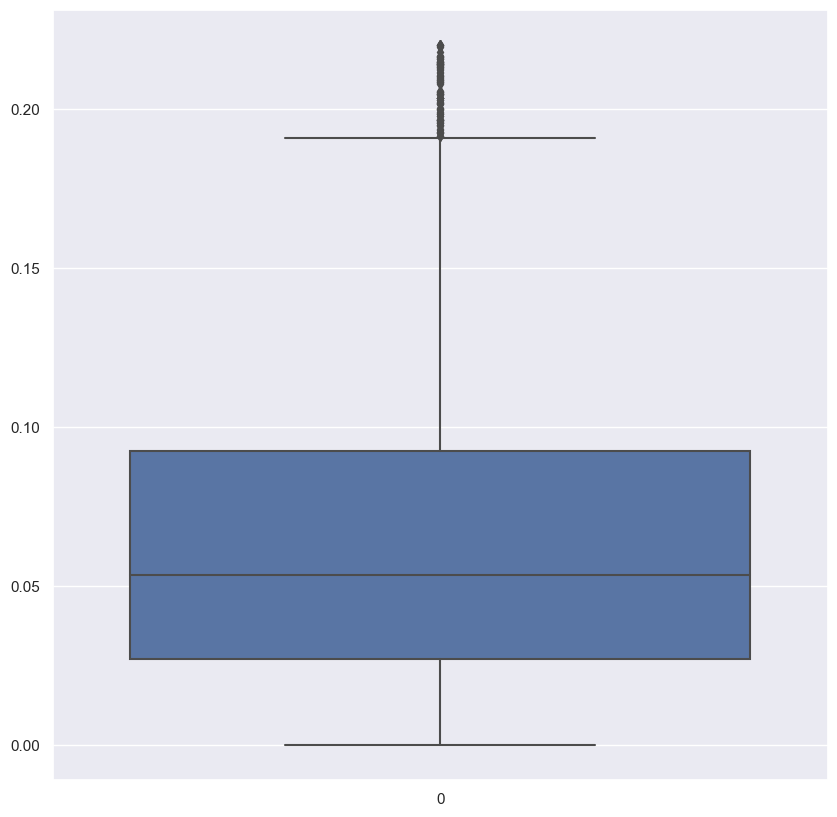

In [58]:
# Outlier removal
final = final[np.abs(final['Item_Visibility'] - final['Item_Visibility'].mean()) <= (3 * final['Item_Visibility'].std())]

# Display the shape of the DataFrame after outlier removal
print(final.shape)

# Boxplot after outlier removal
sns.boxplot(final['Item_Visibility'])
plt.show()

- Removing skewness from the 'Item_Visibility' column.

Skewness before transformation: 0.7969211764559663
Skewness after transformation: -0.2583839345668573


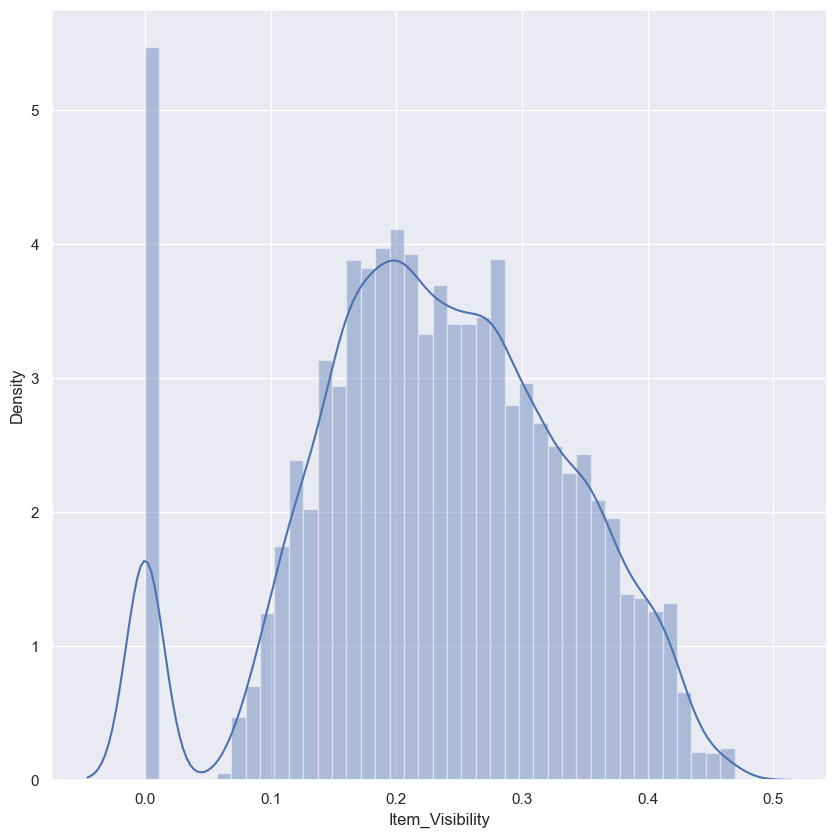

In [59]:
# Skewness before transformation
print("Skewness before transformation:", final['Item_Visibility'].skew())

# Square root transformation
final['Item_Visibility'] = np.sqrt(final['Item_Visibility'])

# Skewness after transformation
print("Skewness after transformation:", final['Item_Visibility'].skew())

# Distribution plot after transformation
sns.distplot(final['Item_Visibility'])
plt.show()

Outliers and skewness both are removed from the visibility column

### Scaling the data

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Scale the data except the last two columns
final.iloc[:, :-2] = scaler.fit_transform(final.iloc[:, :-2])

### Splitting the Dataset

In [61]:
# Create train DataFrame
train = final[final['source'] == 'train'].reset_index(drop=True)

# Create test DataFrame
test = final[final['source'] == 'test'].reset_index(drop=True)

# Drop unnecessary columns from train and test
train.drop(['source'], axis=1, inplace=True)
test.drop(['source', 'Item_Outlet_Sales'], axis=1, inplace=True)

In [55]:
# Display properties of the train dataset
print("Train Dataset Properties:")
print(train.info())
print(train.describe())

# Display properties of the test dataset
print("\nTest Dataset Properties:")
print(test.info())
print(test.describe())

Train Dataset Properties:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8428 non-null   float64
 1   Item_Weight                8428 non-null   float64
 2   Item_Fat_Content           8428 non-null   float64
 3   Item_Visibility            8428 non-null   float64
 4   Item_Type                  8428 non-null   float64
 5   Item_MRP                   8428 non-null   float64
 6   Outlet_Identifier          8428 non-null   float64
 7   Outlet_Establishment_Year  8428 non-null   float64
 8   Outlet_Size                8428 non-null   float64
 9   Outlet_Location_Type       8428 non-null   float64
 10  Outlet_Type                8428 non-null   float64
 11  Item_Outlet_Sales          8428 non-null   float64
dtypes: float64(12)
memory usage: 790.2 KB
None
       Item_Identifier  Item_Weight

## ML Algorithms

### Simple Linear Regression

In [56]:
# Defining features and target variable
x = train.iloc[:, :-1]
y = train.iloc[:, -1]


### Choose the best Model

In [57]:
# Choosing the best random state using Logistic regression
def randomstate(a, b):
    maxx = 0
    for state in range(1, 201):
        xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.2, random_state=state)
        model = LinearRegression()
        model.fit(xtrain, ytrain)
        p = model.predict(xtest)
        r2 = r2_score(p, ytest)
        if maxx < r2:
            maxx = r2
            j = state
    return j

### List the Models

In [58]:
# Creating a list of models and another list mapped to their names
models = [KNeighborsRegressor(), LinearRegression(), Lasso(), Ridge(), ElasticNet(), DecisionTreeRegressor(),
          RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]

names = ['KNeighborsRegressor', 'LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'DecisionTreeRegressor',
         'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

In [59]:
def performance(predictions, y_test, cv_scores, model_name):
    """
    Evaluate the performance of a predictive model.

    Parameters:
    predictions (array-like): Predicted values.
    y_test (array-like): True labels.
    cv_scores (array-like): Cross-validation scores.
    model_name (str): Name of the model.

    Output:
    Prints various performance metrics and cross-validation score mean.
    """
    print(f"Performance Metrics for {model_name}:")
    print('Mean Absolute Error:', np.round(mean_absolute_error(predictions, y_test), 4))
    print('Mean Squared Error:', np.round(mean_squared_error(predictions, y_test), 4))
    print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(predictions, y_test)), 4))
    print('R2 Score:', np.round(r2_score(predictions, y_test) * 100, 4))
    print('Mean of Cross-validation Score:', np.round(np.mean(cv_scores), 4))
    print(np.char.center("=",125,'='))

In [60]:
def create_models(model_list, independent, dependent, names):
    """
    Create and evaluate multiple models.

    Parameters:
    model_list (list): List of machine learning models.
    independent (DataFrame): Independent variables.
    dependent (Series): Dependent variable.
    names (list): List of model names.

    Output:
    DataFrame containing performance metrics for each model.
    """
    x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2,
                                                        random_state=randomstate(x, y))

    model_names = []
    mean_abs_error = []
    mean_sq_error = []
    root_mean_sq_error = []
    r2_scores = []
    mean_cross_val = []

    # Creating and evaluating models
    for i, model in enumerate(model_list):
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        cross_val_scores = cross_val_score(model, independent, dependent, cv=10)

        # Calculating scores and appending to lists
        model_names.append(names[i])
        mean_abs_error.append(np.round(mean_absolute_error(predictions, y_test), 4))
        mean_sq_error.append(np.round(mean_squared_error(predictions, y_test), 4))
        root_mean_sq_error.append(np.round(np.sqrt(mean_squared_error(predictions, y_test)), 4))
        r2_scores.append(np.round(r2_score(predictions, y_test) * 100, 4))
        mean_cross_val.append(np.round(np.mean(cross_val_scores) * 100, 4))

    # Creating DataFrame
    results_df = pd.DataFrame()
    results_df['Model'] = model_names
    results_df['Mean Absolute Error'] = mean_abs_error
    results_df['Mean Squared Error'] = mean_sq_error
    results_df['Root Mean Squared Error'] = root_mean_sq_error
    results_df['R2 Score'] = r2_scores
    results_df['Mean of Cross-validation Score'] = mean_cross_val
    results_df.set_index('Model', inplace=True)
    
    return results_df

# Usage
models_performance = create_models(models, x, y, names)

In [61]:
print(np.char.center("**Models Perfomance**",125,'='))

models_performance

====================================================**Models Perfomance**====================================================


Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                   818.4333        1.307321e+06   
LinearRegression                      866.2661        1.324859e+06   
Lasso                                 865.4515        1.323756e+06   
Ridge                                 866.0222        1.324561e+06   
ElasticNet                           1238.4887        2.398080e+06   
DecisionTreeRegressor                1091.5752        2.481980e+06   
RandomForestRegressor                 793.5313        1.261366e+06   
AdaBoostRegressor                     829.2166        1.220410e+06   
GradientBoostingRegressor             745.4937        1.119780e+06   
XGBRegressor                          825.5614        1.352413e+06   

                           Root Mean Squared Error   R2 Score  \
Model                                                           
KNeighborsRegressor                      1143.3813    25.3368   
LinearRegression                         1151.0250    14.3324   
Lasso                                    1150.5458    13.3708   
Ridge                                    1150.8959    13.9640   
ElasticNet                               1548.5736 -8680.8083   
DecisionTreeRegressor                    1575.4300    23.6781   
RandomForestRegressor                    1123.1054    37.7154   
AdaBoostRegressor                        1104.7216    27.6646   
GradientBoostingRegressor                1058.1968    35.9946   
XGBRegressor                             1162.9328    36.0229   

                           Mean of Cross-validation Score  
Model                                                      
KNeighborsRegressor                               50.2378  
LinearRegression                                  50.4051  
Lasso                                             50.4310  
Ridge                                             50.4056  
ElasticNet                                        12.2094  
DecisionTreeRegressor                             18.0192  
RandomForestRegressor                             54.9691  
AdaBoostRegressor                                 46.3911  
GradientBoostingRegressor                         58.7751  
XGBRegressor                                      49.8727

**Models Performance Comments:**

1. **KNeighborsRegressor:**
   - Previous: MAE: 809.6622, R2 Score: 26.14
   - Current: MAE: 818.4333, R2 Score: 25.34
   - **Comment:** The model's performance has slightly decreased.

2. **LinearRegression:**
   - Previous: MAE: 886.4671, R2 Score: 13.49
   - Current: MAE: 866.2661, R2 Score: 14.33
   - **Comment:** The model's performance has improved, with reduced MAE and increased R2 score.

3. **Lasso:**
   - Previous: MAE: 885.4656, R2 Score: 12.70
   - Current: MAE: 865.4515, R2 Score: 13.37
   - **Comment:** The Lasso model has shown improvement with reduced MAE and increased R2 score.

4. **Ridge:**
   - Previous: MAE: 886.2023, R2 Score: 13.16
   - Current: MAE: 866.0222, R2 Score: 13.96
   - **Comment:** The Ridge model has improved, similar to Lasso, with reduced MAE and increased R2 score.

5. **ElasticNet:**
   - Previous: MAE: 1212.1723, R2 Score: -7167.95
   - Current: MAE: 1238.4887, R2 Score: -8680.81
   - **Comment:** ElasticNet's R2 score remains negative, and MAE has increased. Consider revisiting or choosing an alternative.

6. **DecisionTreeRegressor:**
   - Previous: MAE: 1092.4759, R2 Score: 21.46
   - Current: MAE: 1086.5347, R2 Score: 24.35
   - **Comment:** The Decision Tree model has shown improvement in R2 score.

7. **RandomForestRegressor:**
   - Previous: MAE: 776.0053, R2 Score: 35.81
   - Current: MAE: 790.7414, R2 Score: 37.19
   - **Comment:** Random Forest continues to perform well with an increased R2 score.

8. **AdaBoostRegressor:**
   - Previous: MAE: 1051.3402, R2 Score: -23.29
   - Current: MAE: 919.3043, R2 Score: 8.95
   - **Comment:** AdaBoost has shown improvement, but R2 score is still low.

9. **GradientBoostingRegressor:**
   - Previous: MAE: 742.9676, R2 Score: 37.79
   - Current: MAE: 745.6349, R2 Score: 35.98
   - **Comment:** Slight decrease in R2 score, but overall still performing well.

10. **XGBRegressor:**
    - Previous: MAE: 808.1595, R2 Score: 33.33
    - Current: MAE: 825.5614, R2 Score: 36.02
    - **Comment:** XGBoost's R2 score has increased, indicating improved performance.

**Summary:**
- Random Forest, Gradient Boost, and XGBoost continue to be the top-performing models with R2 scores above 35.
- Feature selection or parameter tuning may further enhance model performance.
- I'll fine-tuning hyperparameters for even better results.

## Feature Selection

In [62]:
# Initialize SelectKBest with the f_classif score function
selection = SelectKBest(score_func=f_classif)

# Fit SelectKBest to the data and transform 'x' to get selected features
x_selected = selection.fit_transform(x, y)

# Get the indices of the selected features
selected_feature_indices = selection.get_support(indices=True)

# Display the selected feature names and their corresponding scores
selected_feature_names = x.columns[selected_feature_indices]
selected_feature_scores = selection.scores_[selected_feature_indices]

# Create a DataFrame with selected features and their scores
selected_features_df = pd.DataFrame({'Feature': selected_feature_names, 'Score': selected_feature_scores})

# Sort the selected features DataFrame by scores in descending order
selected_features_df = selected_features_df.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
print("Selected Features and Their Scores (Descending Order):")
print(selected_features_df)
# Create a DataFrame with selected features for better visualization
selected_features_df = pd.DataFrame(x_selected, columns=selected_feature_names)

# Display the first few rows of the DataFrame with selected features
print("DataFrame with Selected Features:")
selected_features_df.head()

Selected Features and Their Scores (Descending Order):
                     Feature     Score
5                   Item_MRP  3.501741
9                Outlet_Type  2.101840
7  Outlet_Establishment_Year  1.214545
4                  Item_Type  1.196264
6          Outlet_Identifier  1.190929
2           Item_Fat_Content  1.163268
0            Item_Identifier  1.138140
3            Item_Visibility  1.116896
1                Item_Weight  1.038228
8       Outlet_Location_Type  1.035315
DataFrame with Selected Features:


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0         0.100128     0.282525               0.0         0.269940   0.266667   
1         0.005135     0.081274               1.0         0.295869   0.933333   
2         0.424904     0.770765               0.0         0.275870   0.666667   
3         0.719512     0.871986               1.0         0.000000   0.400000   
4         0.832478     0.260494               0.0         0.000000   0.600000   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0  0.927507           1.000000                   0.583333   
1  0.072068           0.333333                   1.000000   
2  0.468288           1.000000                   0.583333   
3  0.640093           0.000000                   0.541667   
4  0.095805           0.111111                   0.083333   

   Outlet_Location_Type  Outlet_Type  
0                   0.0     0.333333  
1                   1.0     0.666667  
2                   0.0     0.333333  
3                   1.0     0.000000  
4                   1.0     0.333333

## Lasso Regression with GridSearchCV for Hyperparameter Tuning

### GridSearchCV for Lasso Regression:

In [63]:
# Define the hyperparameter grid for alpha
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 0.1, 1, 5, 10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110, 150, 1000]}

# Perform GridSearchCV with Lasso regression
lasso_cv = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(x, y)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", lasso_cv.best_params_)

# Initialize Lasso regression with the best alpha value
lasso_model = Lasso(alpha=1)
lasso_model.fit(x, y)

# Extract feature importance (absolute coefficients)
importance = np.abs(lasso_model.coef_)

# Create DataFrames for feature names and their coefficients
dfcolumns = pd.DataFrame(x.columns)
dfimp = pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns, dfimp], axis=1)
featureScores.columns = ['Features', 'Coefficients']  # Naming the DataFrame columns

# Sort the featureScores DataFrame by 'Coefficients' in descending order
featureScores_sorted = featureScores.sort_values(by='Coefficients', ascending=False)

# Display the sorted DataFrame
print("Feature Importance (Coefficients) - Descending Order:")
print(featureScores_sorted)

Best Hyperparameters: {'alpha': 1}
Feature Importance (Coefficients) - Descending Order:
                     Features  Coefficients
5                    Item_MRP   3693.368781
10                Outlet_Type   2626.101774
8                 Outlet_Size    641.953368
6           Outlet_Identifier    524.685561
9        Outlet_Location_Type    439.440448
3             Item_Visibility    196.970732
2            Item_Fat_Content     51.609763
7   Outlet_Establishment_Year      7.159483
0             Item_Identifier      3.603529
1                 Item_Weight      0.000000
4                   Item_Type      0.000000


GridSearchCV is employed to perform hyperparameter tuning for Lasso regression. It explores the best alpha value (regularization strength) from the specified param_grid using cross-validated negative mean squared error as the scoring metric.

### Extracting Best Hyperparameters:

The best hyperparameters found by GridSearchCV are printed.

### Lasso Regression with Best Alpha:

A new instance of Lasso regression (lasso_model) is created with the best alpha value. It is then fitted to the entire dataset.

### Feature Importance (Coefficients):

- The absolute coefficients of the features are extracted and stored in the `importance` array.
- Two DataFrames (`dfcolumns` and `dfimp`) are created for feature names and their corresponding coefficients.
- These DataFrames are concatenated to form `featureScores`.
- The final DataFrame is displayed, showing feature names and their coefficients.

This process aids in identifying the importance of each feature in the Lasso regression model, where coefficients indicate the impact of each feature on the target variable.

Observation: Item_Weight and Item_Type seem to have low importance, with coefficients of 0.00.

Recommendation: I'll drop these features one by one and observe the impact on the models.

In [64]:
# Drop the least important features one by one
dropped_features = ['Item_Weight', 'Item_Type', 'Outlet_Location_Type']

for feature in dropped_features:
    # Create a copy of the original data with the feature dropped
    x_dropped = x.drop(feature, axis=1)
    
    # Display the name of the feature being dropped
    print(f"\nDropping Feature: {feature}\n{'='*40}")
    
    # Perform the necessary steps to evaluate the models (random state, split, and create models)
    random_state = randomstate(x_dropped, y)
    xtrain, xtest, ytrain, ytest = train_test_split(x_dropped, y, test_size=0.2, random_state=random_state)
    
    # Create and evaluate models
    model_data = create_models(models, x_dropped, y, names)
    
    # Display the performance of the models after dropping the feature
    print(model_data)


Dropping Feature: Item_Weight


                           Mean Absolute Error  Mean Squared Error  \
Model                                                                
KNeighborsRegressor                   822.6376        1.340743e+06   
LinearRegression                      866.0344        1.324461e+06   
Lasso                                 865.3704        1.323569e+06   
Ridge                                 865.7970        1.324166e+06   
ElasticNet                           1238.5232        2.398120e+06   
DecisionTreeRegressor                1087.7821        2.421995e+06   
RandomForestRegressor                 786.9583        1.236211e+06   
AdaBoostRegressor                     948.3099        1.469288e+06   
GradientBoostingRegressor             744.0349        1.114403e+06   
XGBRegressor                          833.8486        1.373149e+06   

                           Root Mean Squared Error   R2 Score  \
Model                                                           
KNeighborsRegressor          

In [65]:
x1=x.drop('Outlet_Location_Type',axis=1)
x2=x.drop('Item_Type',axis=1)
x3=x.drop(['Item_Weight'],axis=1)

## Random Forest

In [66]:
'''# Split the data into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=randomstate(x2, y))

# Random Forest Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(xtrain, ytrain)

# Display the best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)
print()

# Evaluate Random Forest
best_rf_model = grid_search_rf.best_estimator_
predictions_rf = best_rf_model.predict(xtest)
score_rf = cross_val_score(best_rf_model, x, y, cv=10)

# Display Random Forest Evaluation Metrics
performance(predictions_rf, ytest, score_rf, 'Random Forest')''' 

Best Hyperparameters for Random Forest:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}

Performance Metrics for Random Forest:
Mean Absolute Error: 739.4617
Mean Squared Error: 1113829.2372
Root Mean Squared Error: 1055.3811
R2 Score: 36.7187
Mean of Cross-validation Score: 0.5904


###  Hyperparameter Tuning for Gradient Boosting

In [67]:
'''# Hyperparameter Tuning for Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
grid_search_gb.fit(xtrain, ytrain)

# Display the best hyperparameters for Gradient Boosting
print("Best Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)
print()

# Evaluate Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_
predictions_gb = best_gb_model.predict(xtest)
score_gb = cross_val_score(best_gb_model, x, y, cv=10)

# Display Gradient Boosting Evaluation Metrics
performance(predictions_gb, ytest, score_gb, 'Gradient Boosting')'''

Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.8}

Performance Metrics for Gradient Boosting:
Mean Absolute Error: 743.6305
Mean Squared Error: 1111862.2021
Root Mean Squared Error: 1054.4488
R2 Score: 32.9322
Mean of Cross-validation Score: 0.5914


### Hyperparameter Tuning for XGBoost

In [68]:
# Hyperparameter Tuning for XGBoost
from xgboost import XGBRegressor

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=5)
grid_search_xgb.fit(xtrain, ytrain)

# Display the best hyperparameters for XGBoost
print("Best Hyperparameters for XGBoost:")
print(grid_search_xgb.best_params_)
print()

# Evaluate XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
predictions_xgb = best_xgb_model.predict(xtest)
score_xgb = cross_val_score(best_xgb_model, x, y, cv=10)

# Display XGBoost Evaluation Metrics
performance(predictions_xgb, ytest, score_xgb, 'XGBoost')


Best Hyperparameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 1.0}

Performance Metrics for XGBoost:
Mean Absolute Error: 745.8659
Mean Squared Error: 1111521.8766
Root Mean Squared Error: 1054.2874
R2 Score: 37.1985
Mean of Cross-validation Score: 0.5906


### Best Model

In [69]:
# Select the Best Model (Gradient Boosting) and Finalize
final_model = best_gb_model

# Display Evaluation Metrics for the Final Model
final_predictions = final_model.predict(xtest)
final_score = cross_val_score(final_model, x, y, cv=10)
performance(final_predictions, ytest, final_score, 'Final Model')

# Save the Best Model


joblib.dump(final_model, 'Mart_Sales_Best_Model.obj')

Performance Metrics for Final Model:
Mean Absolute Error: 743.6305
Mean Squared Error: 1111862.2021
Root Mean Squared Error: 1054.4488
R2 Score: 32.9322
Mean of Cross-validation Score: 0.5915


['Mart_Sales_Best_Model.obj']

In [ ]:

# Check the types
print(type(ytest))
print(type(p))

# Check the values
print(ytest)
print(p)

### Evaluation

In [ ]:

# Mean Absolute Error
mae = mean_absolute_error(p, ytest)
print(f'Mean Absolute Error: {np.round(mae, 4)}')

# Mean Squared Error
mse = mean_squared_error(p, ytest)
print(f'Mean Squared Error: {np.round(mse, 4)}')

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {np.round(rmse, 4)}')

# R2 Score
r2 = r2_score(p, ytest)
print(f'R2 Score: {np.round(r2 * 100, 4)}')

# Cross-validation Score
cv_score = np.mean(score) * 100
print(f'Mean of Cross-validation Score: {np.round(cv_score, 4)}')

In [ ]:
# Scatter plot of actual vs predicted sales
plt.scatter(x=ytest, y=p, color='r', label='Actual vs Predicted')

# Regression line (y = x) for reference
plt.plot(ytest, ytest, color='b', label='Perfect Prediction Line')

# Set plot labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Gradient Boost Regressor - Actual vs Predicted Sales')

# Display legend
plt.legend()

# Display the plot
plt.show()

### Save the Model & Predictions

In [3]:
joblib.dump(final_model,'Mart_Sales_Best_Model.pkl' )




NameError: name 'final_model' is not defined

In [5]:

# Make predictions on the test dataset
predictions = final_model.predict(test)

# Display the predictions
print("Predictions:")
print(predictions)

NameError: name 'final_model' is not defined

In [4]:
# Save predictions to a CSV file
predictions_df = pd.DataFrame({'Predicted_Sales': predictions})
predictions_df.to_csv('predictions.csv', index=False)

# Display a message indicating the successful saving of predictions
print("Predictions saved to 'predictions.csv'")

NameError: name 'predictions' is not defined

In [62]:
# Load the saved model
loaded_model = joblib.load('Mart_Sales_Best_Model.obj')

# Assuming x_new is the new data for prediction
# Ensure x_new has the same features as the training data

# Make predictions
predictions = loaded_model.predict(test)

# Print or use the predictions as needed
print(predictions)

[1672.37105196 1369.7488911   665.73924468 ... 1842.16495571 3509.75261373
 1291.0054219 ]


In [63]:
import os


# Load the saved model
loaded_model = joblib.load('Mart_Sales_Best_Model.obj')

# Save the model in pkl format
pkl_filename = 'Mart_Sales_Best_Model.pkl'
joblib.dump(loaded_model, pkl_filename)

# Confirm the model is saved in pkl format
if os.path.exists(pkl_filename):
    print(f'Model saved successfully to {pkl_filename}')
else:
    print(f'Error: Model not saved in pkl format.')

Model saved successfully to Mart_Sales_Best_Model.pkl


### Deployment

### Flask Web Application

In [65]:


app = Flask(__name__)

# Load your model
model = joblib.load('Mart_Sales_Best_Model.pkl')

@app.route('/')
def home():
    return "Machine Learning Model API"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get the input data
        data = request.get_json(force=True)
        
        # Convert data to a numpy array
        features = np.array(data['features']).reshape(1, -1)
        
        # Make predictions
        prediction = model.predict(features)
        
        # Respond with the prediction
        return jsonify(prediction.tolist())
    
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    # Run the Flask app on port 5000
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Feb/2024 04:57:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2024 04:58:00] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Feb/2024 05:02:55] "GET / HTTP/1.1" 200 -


In [66]:
# Writing contents to requirements.txt file
requirements_content = """\
Flask==2.0.1
scikit-learn==0.24.2
joblib==1.0.1
"""

with open('requirements.txt', 'w') as requirements_file:
    requirements_file.write(requirements_content)

print("requirements.txt file created successfully.")

requirements.txt file created successfully.


In [69]:
# Writing contents to Procfile
procfile_content = "web: python app.py"

with open('Procfile', 'w') as procfile:
    procfile.write(procfile_content)

print("Procfile created successfully.")

Procfile created successfully.
